# Loading necessary Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats

# Machine learning libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor

# Dasboard Plotly Visulization libraries
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import dash_bootstrap_components as dbc

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Saving and loading models
import joblib

# Handling datetime
from datetime import timedelta

# Error handling
from sklearn.exceptions import NotFittedError

# Display settings for better visualization
pd.set_option('display.max_columns', None)  # Show all columns
sns.set_style('whitegrid')  # Set visualization style


# Loading dataset Food Inflation

In [2]:
# Path to the downloaded CSV file
file_path = './FI_Data/WLD_RTFP_country_2024-11-18.csv'

try:
    # Load the CSV file into a DataFrame
    food_price_df = pd.read_csv(file_path)

    # Display the first few rows of the dataset
    print("First Few Rows of the Dataset:")
    print(food_price_df.head())

    # Display basic information about the dataset
    print("\nDataset Info:")
    print(food_price_df.info())

    # Display the column names
    print("\nDataset Columns:")
    print(food_price_df.columns)

except FileNotFoundError:
    print(f"File not found. Please check the file path: {file_path}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")


First Few Rows of the Dataset:
   o_food_price_index  High   Low  c_food_price_index  \
0                0.53  0.54  0.53                0.53   
1                0.53  0.54  0.53                0.54   
2                0.54  0.54  0.53                0.54   
3                0.54  0.55  0.53                0.55   
4                0.56  0.58  0.56                0.58   

   inflation_food_price_index      country ISO3     DATES  month  year  
0                         NaN  Afghanistan  AFG  01/01/07      1  2007  
1                         NaN  Afghanistan  AFG  01/02/07      2  2007  
2                         NaN  Afghanistan  AFG  01/03/07      3  2007  
3                         NaN  Afghanistan  AFG  01/04/07      4  2007  
4                         NaN  Afghanistan  AFG  01/05/07      5  2007  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ----

# Identifying relevant columns and data cleaning

Dataset Overview:
   o_food_price_index  High   Low  c_food_price_index  \
0                0.53  0.54  0.53                0.53   
1                0.53  0.54  0.53                0.54   
2                0.54  0.54  0.53                0.54   
3                0.54  0.55  0.53                0.55   
4                0.56  0.58  0.56                0.58   

   inflation_food_price_index      country ISO3     DATES  month  year  
0                         NaN  Afghanistan  AFG  01/01/07      1  2007  
1                         NaN  Afghanistan  AFG  01/02/07      2  2007  
2                         NaN  Afghanistan  AFG  01/03/07      3  2007  
3                         NaN  Afghanistan  AFG  01/04/07      4  2007  
4                         NaN  Afghanistan  AFG  01/05/07      5  2007  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------           

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

       o_food_price_index  c_food_price_index  inflation_food_price_index  \
count         7344.000000         7344.000000                 7344.000000   
mean             1.750914            1.767834                   12.185195   
std              9.086375            9.436105                   31.637919   
min              0.010000            0.010000                  -33.500000   
25%              0.790000            0.790000                    0.037500   
50%              0.970000            0.970000                    4.725000   
75%              1.120000            1.130000                   13.265000   
max            328.870000          351.790000                  460.900000   

              year        month  
count  7344.000000  7344.000000  
mean   2015.789216     6.473039  
std       5.072023     3.439140  
min    2007.000000     1.000000  
25%    2012.000000     3.000000  
50%    2016.000000     6.000000  
75%    2020.000000     9.000000  
max    2024.000000    12.000000  


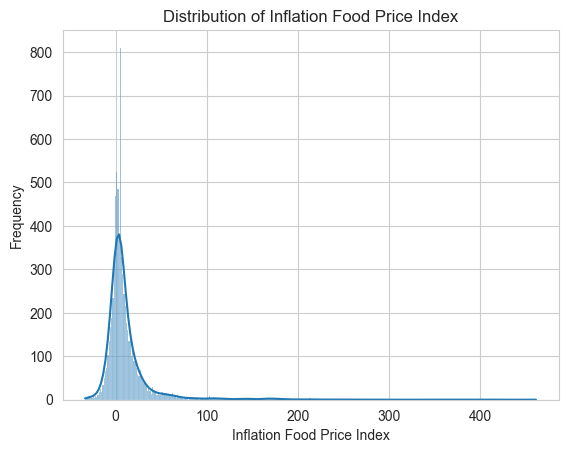

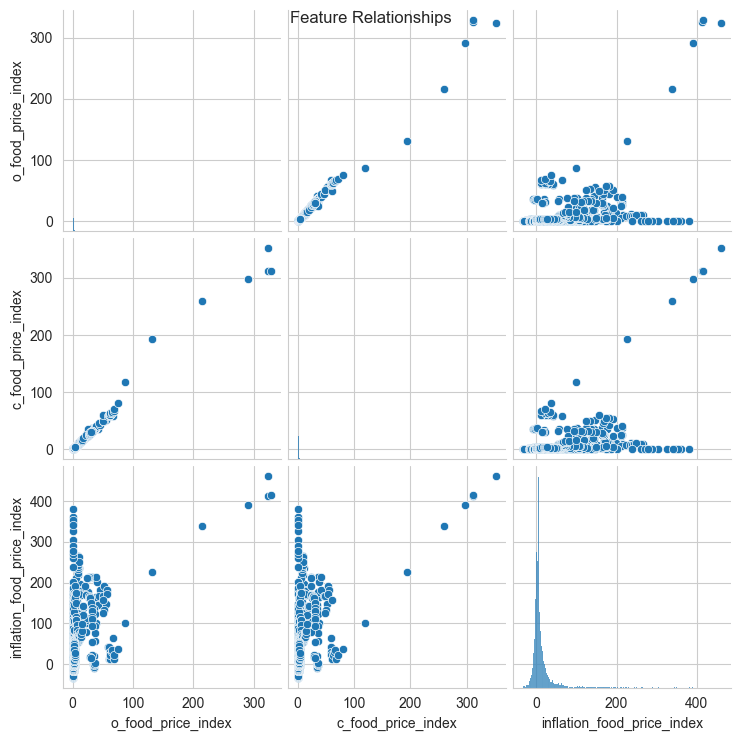


Correlation of Features with Inflation Food Price Index:
inflation_food_price_index    1.000000
o_food_price_index            0.452404
c_food_price_index            0.450625
year                          0.163141
month                         0.008069
Name: inflation_food_price_index, dtype: float64


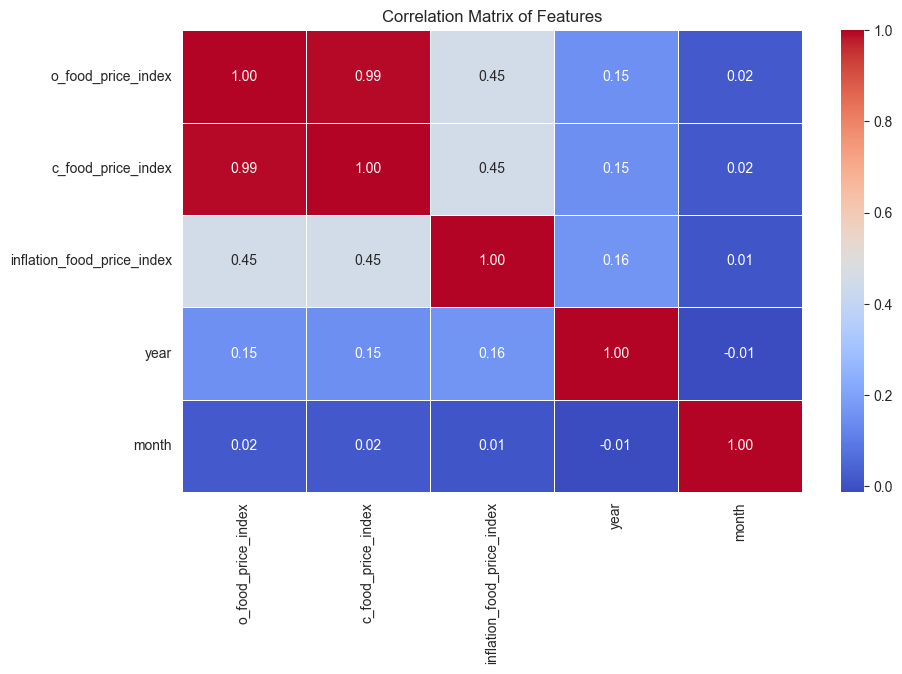


Cleaned Food Price Dataset:
   o_food_price_index  c_food_price_index  inflation_food_price_index  year  \
0                0.53                0.53                       4.725  2007   
1                0.53                0.54                       4.725  2007   
2                0.54                0.54                       4.725  2007   
3                0.54                0.55                       4.725  2007   
4                0.56                0.58                       4.725  2007   

   month      DATES      country  
0      1 2007-01-01  Afghanistan  
1      2 2007-01-02  Afghanistan  
2      3 2007-01-03  Afghanistan  
3      4 2007-01-04  Afghanistan  
4      5 2007-01-05  Afghanistan  


In [3]:
# Step 1: Inspect the dataset
print("Dataset Overview:")
print(food_price_df.head())

print("\nDataset Info:")
print(food_price_df.info())

# Step 2: Extract relevant columns
relevant_columns = ['o_food_price_index', 'c_food_price_index', 'inflation_food_price_index',
                    'year', 'month', 'DATES', 'country']
food_price_data = food_price_df[relevant_columns]

# Step 3: Handle missing values
print("\nMissing Values Before Cleaning:")
print(food_price_data.isna().sum())

# Fill missing values ONLY in columns that have missing data
columns_with_missing = food_price_data.columns[food_price_data.isna().any()]  # Identify columns with missing values
numeric_columns_with_missing = food_price_data[columns_with_missing].select_dtypes(include=['number']).columns  # Only numeric columns

# Fill missing values in numeric columns with their median
for col in numeric_columns_with_missing:
    food_price_data[col].fillna(food_price_data[col].median(), inplace=True)

print("\nMissing Values After Cleaning:")
print(food_price_data.isna().sum())

# Step 4: Convert data types
# Convert `DATES` to datetime
food_price_data['DATES'] = pd.to_datetime(food_price_data['DATES'], errors='coerce')

# Ensure all numeric columns are float
numeric_columns = ['o_food_price_index', 'c_food_price_index', 'inflation_food_price_index']
food_price_data[numeric_columns] = food_price_data[numeric_columns].astype(float)

# Step 5: Perform EDA
print("\nSummary Statistics:")
print(food_price_data.describe())

sns.histplot(food_price_data['inflation_food_price_index'], kde=True)
plt.title("Distribution of Inflation Food Price Index")
plt.xlabel("Inflation Food Price Index")
plt.ylabel("Frequency")
plt.show()

# Check for outliers or trends in features
sns.pairplot(food_price_data, vars=numeric_columns)
plt.suptitle("Feature Relationships")
plt.show()

# Step 6: Correlation matrix
# Select numeric columns for correlation calculation
numeric_columns = food_price_data.select_dtypes(include=['number']).columns
correlation_matrix = food_price_data[numeric_columns].corr()

# Display correlation with target variable
if 'inflation_food_price_index' in correlation_matrix.columns:
    target_correlation = correlation_matrix['inflation_food_price_index'].sort_values(ascending=False)
    print("\nCorrelation of Features with Inflation Food Price Index:")
    print(target_correlation)

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Final dataset preview
print("\nCleaned Food Price Dataset:")
print(food_price_data.head())

# Outlier Detection and Transformation


In [4]:
# List of columns to check for outliers
columns_to_check = ['o_food_price_index', 'c_food_price_index', 'inflation_food_price_index']

# Initialize a dictionary to store outliers for each column
outliers = {}

# Iterate over each column to check for outliers
for column in columns_to_check:
    print(f"\nChecking outliers in column: {column}")

    # Check for outliers using Z-scores
    z_scores = stats.zscore(food_price_data[column])
    z_outliers = np.where(np.abs(z_scores) > 3)  # Identify rows where Z-score > 3
    outliers[column] = {'z_outliers': z_outliers}

    # Check for outliers using IQR method
    Q1 = food_price_data[column].quantile(0.25)
    Q3 = food_price_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    iqr_outliers = food_price_data[(food_price_data[column] < lower_bound) |
                                   (food_price_data[column] > upper_bound)]
    outliers[column]['iqr_outliers'] = iqr_outliers

    # Print outlier information
    print("Outliers based on Z-score:")
    print(food_price_data.iloc[z_outliers])
    print("\nOutliers based on IQR method:")
    print(iqr_outliers)

    # Apply log transformation only for positive values
    if len(iqr_outliers) > 0 or len(z_outliers[0]) > 0:
        # Ensure all values are positive before log transformation
        if food_price_data[column].min() > 0:
            print(f"\nApplying Log Transformation to '{column}'...")
            food_price_data[f'{column}_transformed'] = np.log1p(food_price_data[column])
            print(f"Log transformation applied and stored in a new column: '{column}_transformed'.")
        else:
            # Handle non-positive values (e.g., set negative values to a small positive number)
            food_price_data[column] = food_price_data[column].apply(lambda x: max(x, 1e-6))
            food_price_data[f'{column}_transformed'] = np.log1p(food_price_data[column])
            print(f"Log transformation applied after handling non-positive values for '{column}'.")
    else:
        print(f"\nNo significant outliers detected in '{column}'. Skipping log transformation.")

# Final dataset preview after handling outliers and transformations
print("\nCleaned Food Price Dataset After Outlier Handling:")
print(food_price_data.head())

# Optionally: Display summary of outliers detected for each column
print("\nSummary of Outliers Detected:")
for column, outlier_info in outliers.items():
    print(f"\n{column}:")
    print(f"Z-score outliers: {len(outlier_info['z_outliers'][0])}")
    print(f"IQR outliers: {len(outlier_info['iqr_outliers'])}")



Checking outliers in column: o_food_price_index
Outliers based on Z-score:
      o_food_price_index  c_food_price_index  inflation_food_price_index  \
3657               31.80               36.42                      213.03   
3658               39.94               38.10                      201.86   
3659               41.61               34.69                      160.42   
3660               38.23               37.22                      164.71   
3661               41.85               34.99                      144.20   
...                  ...                 ...                         ...   
6933               32.09               31.44                       93.21   
6934               32.25               31.16                       53.08   
6935               31.62               29.63                       22.33   
6936               29.38               29.67                       16.81   
6937               30.08               30.93                       15.48   

      year 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

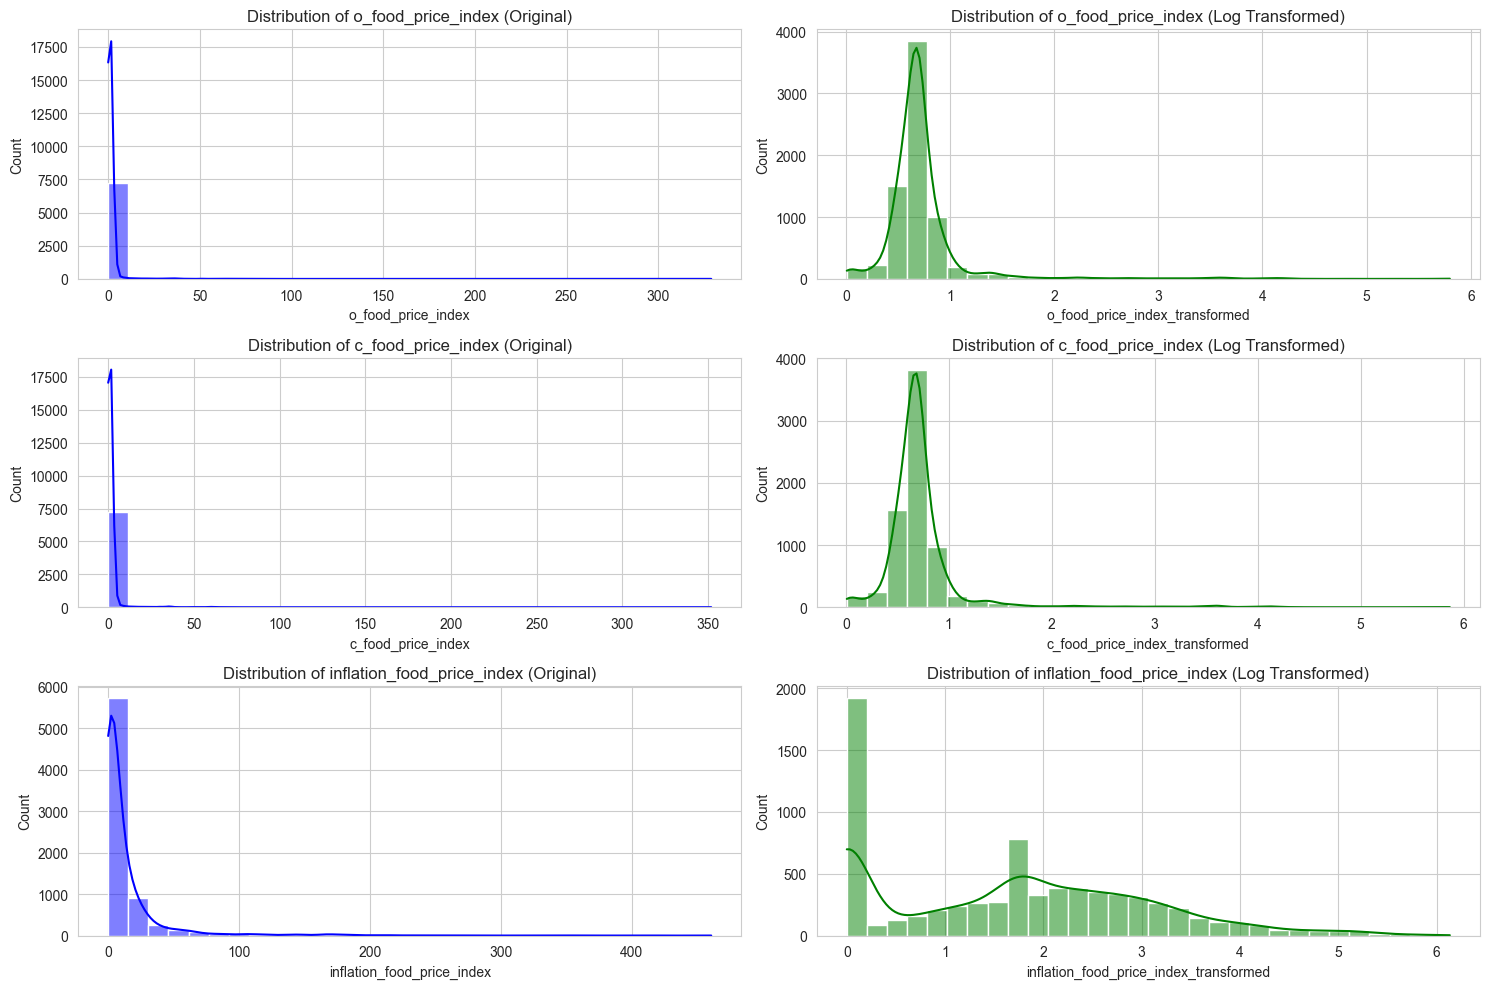

In [5]:
# List of columns to check for distribution after transformation
columns_to_check = ['o_food_price_index', 'c_food_price_index', 'inflation_food_price_index']

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Iterate over each column to plot histograms
for i, column in enumerate(columns_to_check):
    # Original column
    plt.subplot(3, 2, 2*i + 1)
    sns.histplot(food_price_data[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column} (Original)')

    # Transformed column
    plt.subplot(3, 2, 2*i + 2)
    sns.histplot(food_price_data[f'{column}_transformed'], kde=True, color='green', bins=30)
    plt.title(f'Distribution of {column} (Log Transformed)')

plt.tight_layout()
plt.show()


### **Outlier Detection:**

Outliers were detected using the Z-score and IQR methods. These outliers flagged extreme inflation values or drastic price changes.

### **Log Transformation:**

Original Distribution of O_food_price_index (opening day food price):
- The distribution is skewed with a long right tail, indicating a possible exponential or log-normal distribution.

Log-transformed Distribution of O_food_price_index: 
- The distribution is more normalized and bell-shaped after the log transformation, meeting the expected result.
- This suggests the log transformation was effective in making the data more suitable for analysis.

Original Distribution of C_food_price_index (closing day food price):
- Similar to the O_food_price_index, the distribution is skewed with a long right tail.

Log-transformed Distribution of C_food_price_index:
- The log-transformed distribution is more symmetrical and bell-shaped, again meeting the expected result.
- The transformation has normalized the data, making it more appropriate for further analysis.

Original Distribution of Inflation_food_price_index:
- This distribution shows a bimodal pattern, with two distinct peaks.
- This indicates the data may have a complex underlying structure that the original scale cannot fully capture.

Log-transformed Distribution of Inflation_food_price_index: 
- The log-transformed distribution is much more normalized and unimodal.
- The transformation has effectively addressed the bimodal nature of the original data.

Overall, the log transformation has achieved the expected results of normalizing the data distributions, making them more suitable for further statistical analysis and modeling.

# EDA and Feature Selection

   o_food_price_index  c_food_price_index  inflation_food_price_index  year  \
0                0.53                0.53                       4.725  2007   
1                0.53                0.54                       4.725  2007   
2                0.54                0.54                       4.725  2007   
3                0.54                0.55                       4.725  2007   
4                0.56                0.58                       4.725  2007   

   month      DATES      country  o_food_price_index_transformed  \
0      1 2007-01-01  Afghanistan                        0.425268   
1      2 2007-01-02  Afghanistan                        0.425268   
2      3 2007-01-03  Afghanistan                        0.431782   
3      4 2007-01-04  Afghanistan                        0.431782   
4      5 2007-01-05  Afghanistan                        0.444686   

   c_food_price_index_transformed  inflation_food_price_index_transformed  
0                        0.425268       

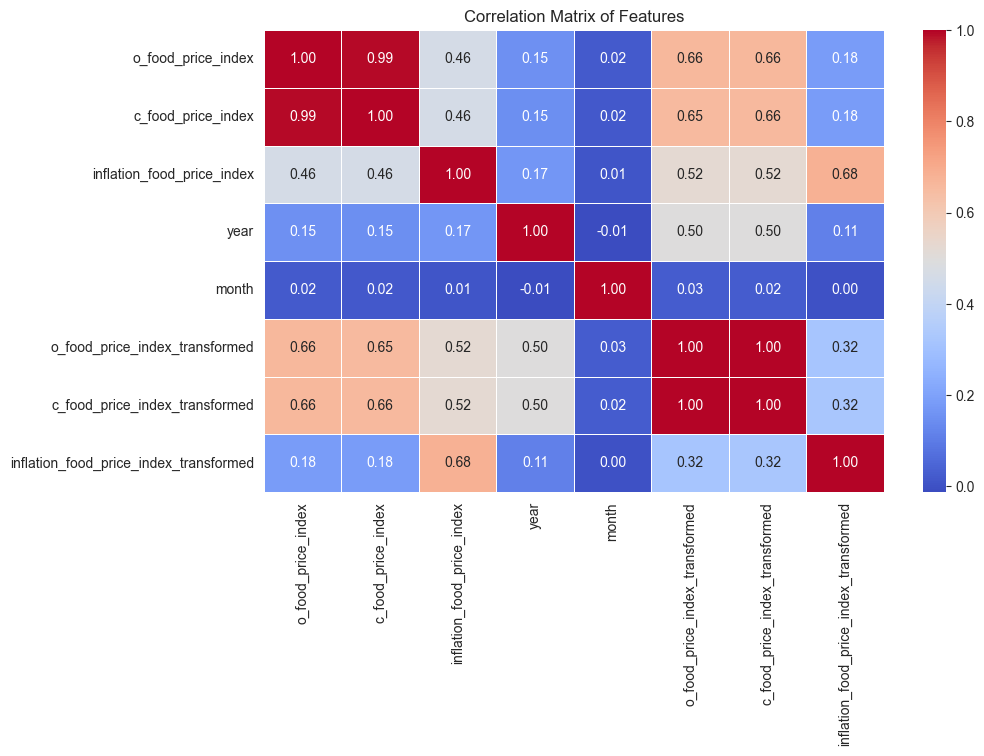

   o_food_price_index  c_food_price_index  inflation_food_price_index  year  \
0                0.53                0.53                       4.725  2007   
1                0.53                0.54                       4.725  2007   
2                0.54                0.54                       4.725  2007   
3                0.54                0.55                       4.725  2007   
4                0.56                0.58                       4.725  2007   

   month      DATES      country  o_food_price_index_transformed  \
0      1 2007-01-01  Afghanistan                        0.425268   
1      2 2007-01-02  Afghanistan                        0.425268   
2      3 2007-01-03  Afghanistan                        0.431782   
3      4 2007-01-04  Afghanistan                        0.431782   
4      5 2007-01-05  Afghanistan                        0.444686   

   c_food_price_index_transformed  inflation_food_price_index_transformed  
0                        0.425268       

In [6]:
# Calculate correlation matrix
print(food_price_data.head())
correlation_matrix =food_price_data.drop(columns=['country']).corr()

# Display correlation of all features with the target variable 'inflation_food_price_index_transformed'
target_correlation = correlation_matrix['inflation_food_price_index_transformed'].sort_values(ascending=False)
# Show the top correlated features
print("\nCorrelation of Features with Inflation Food Price Index (Transformed):")
print(target_correlation)
# Optionally, plot the correlation heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()
print(food_price_data.head())

### **Key Correlation Insights:**

1. **Strong Correlations with the Target (`inflation_food_price_index_transformed`):**
   - **`inflation_food_price_index_transformed`:** Perfect correlation (**1.000**), as expected.
   
2. **Moderate Correlations:**
   - **`c_food_price_index_transformed`:** Moderate correlation (**0.321**). Suggests this transformed variable may have predictive value when combined with others.
   - **`o_food_price_index_transformed`:** Similar moderate correlation (**0.318**), making it another potential contributor to a multivariate model.

3. **Low Correlations:**
   - **`o_food_price_index`:** Weak positive correlation (**0.184**). The untransformed value has limited direct relationship with the target.
   - **`c_food_price_index`:** Weak correlation (**0.183**), showing slightly higher relevance than its original counterpart.



Missing Values in the dataset:
o_food_price_index                        0
c_food_price_index                        0
inflation_food_price_index                0
year                                      0
month                                     0
DATES                                     0
country                                   0
o_food_price_index_transformed            0
c_food_price_index_transformed            0
inflation_food_price_index_transformed    0
dtype: int64


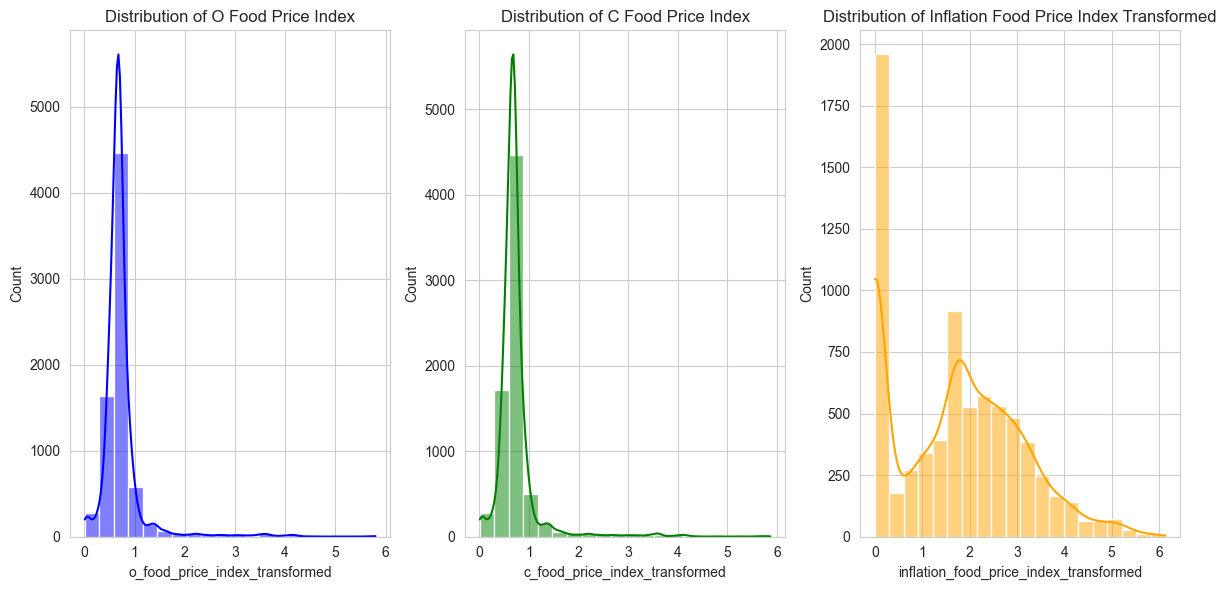

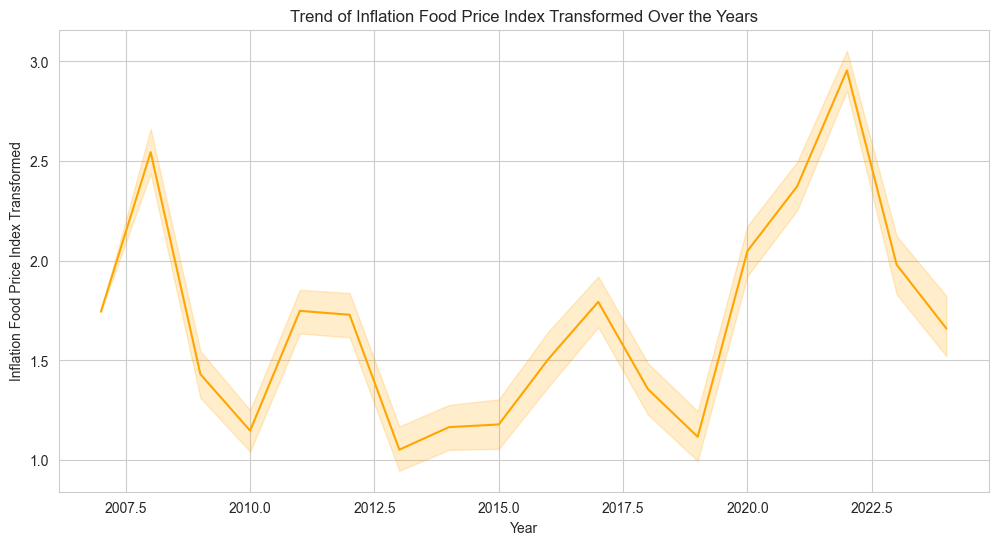

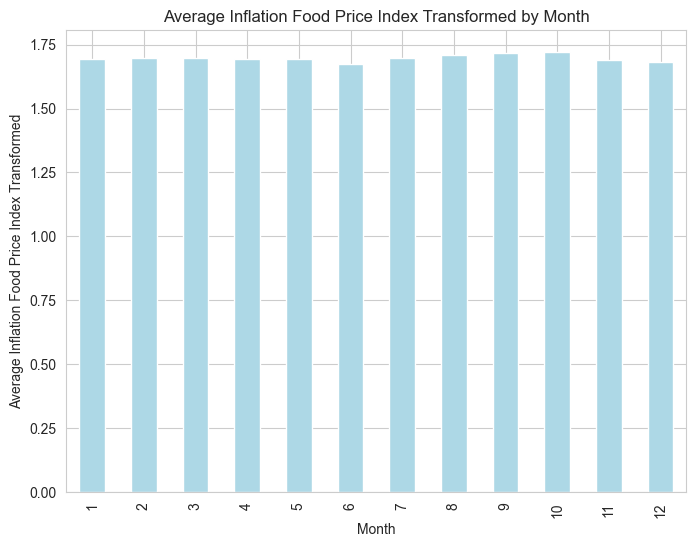

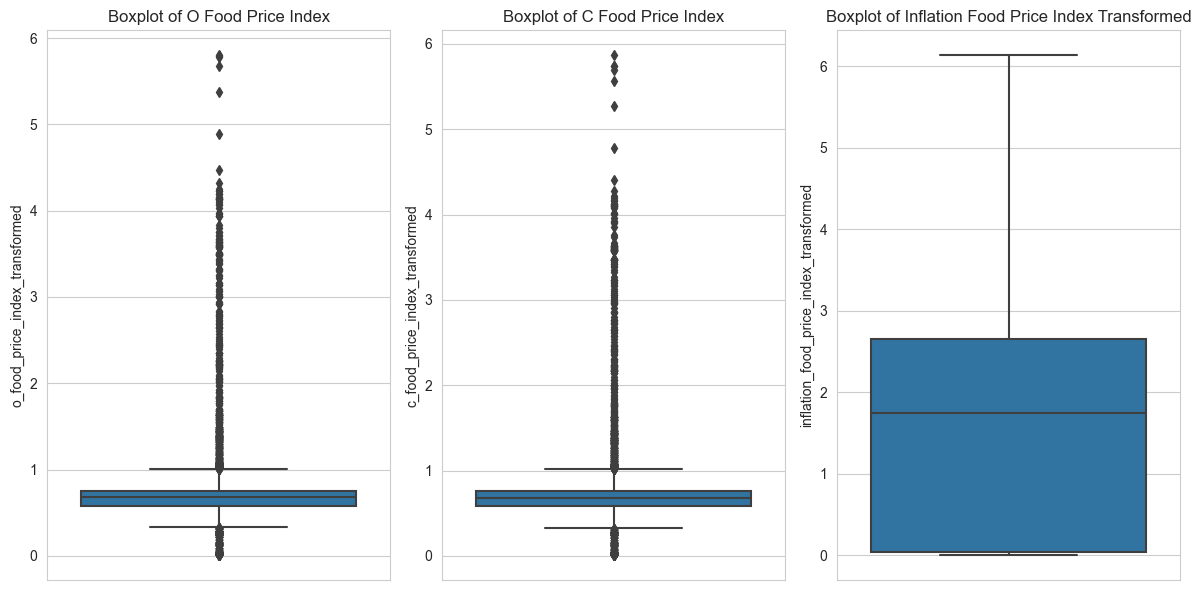

/n Dataset
   o_food_price_index  c_food_price_index  inflation_food_price_index  year  \
0                0.53                0.53                       4.725  2007   
1                0.53                0.54                       4.725  2007   
2                0.54                0.54                       4.725  2007   
3                0.54                0.55                       4.725  2007   
4                0.56                0.58                       4.725  2007   

   month      DATES      country  o_food_price_index_transformed  \
0      1 2007-01-01  Afghanistan                        0.425268   
1      2 2007-01-02  Afghanistan                        0.425268   
2      3 2007-01-03  Afghanistan                        0.431782   
3      4 2007-01-04  Afghanistan                        0.431782   
4      5 2007-01-05  Afghanistan                        0.444686   

   c_food_price_index_transformed  inflation_food_price_index_transformed  
0                        0.42

In [7]:
# 1. Check for missing values in the transformed target variable
print("\nMissing Values in the dataset:")
print(food_price_data.isna().sum())

# 2. Visualize distributions of key variables (o_food_price_index_transformed, c_food_price_index_transformed, inflation_food_price_index_transformed)
plt.figure(figsize=(12, 6))

# Distribution of O Food Price Index
plt.subplot(1, 3, 1)
sns.histplot(food_price_data['o_food_price_index_transformed'], kde=True, color='blue', bins=20)
plt.title('Distribution of O Food Price Index')

# Distribution of C Food Price Index
plt.subplot(1, 3, 2)
sns.histplot(food_price_data['c_food_price_index_transformed'], kde=True, color='green', bins=20)
plt.title('Distribution of C Food Price Index')

# Distribution of Inflation Food Price Index Transformed
plt.subplot(1, 3, 3)
sns.histplot(food_price_data['inflation_food_price_index_transformed'], kde=True, color='orange', bins=20)
plt.title('Distribution of Inflation Food Price Index Transformed')

plt.tight_layout()
plt.show()

# 3. Trend Analysis (Inflation Food Price Index Transformed over the years)
plt.figure(figsize=(12, 6))
sns.lineplot(x=food_price_data['year'], y=food_price_data['inflation_food_price_index_transformed'], color='orange')
plt.title('Trend of Inflation Food Price Index Transformed Over the Years')
plt.xlabel('Year')
plt.ylabel('Inflation Food Price Index Transformed')
plt.grid(True)
plt.show()

# 4. Seasonal Analysis: Plot average inflation_food_price_index_transformed by month
monthly_inflation = food_price_data.groupby('month')['inflation_food_price_index_transformed'].mean()
plt.figure(figsize=(8, 6))
monthly_inflation.plot(kind='bar', color='lightblue')
plt.title('Average Inflation Food Price Index Transformed by Month')
plt.xlabel('Month')
plt.ylabel('Average Inflation Food Price Index Transformed')
plt.grid(True)
plt.show()

# 5. Outlier Detection (Boxplots)
plt.figure(figsize=(12, 6))

# Boxplot of O Food Price Index
plt.subplot(1, 3, 1)
sns.boxplot(y=food_price_data['o_food_price_index_transformed'])
plt.title('Boxplot of O Food Price Index')

# Boxplot of C Food Price Index
plt.subplot(1, 3, 2)
sns.boxplot(y=food_price_data['c_food_price_index_transformed'])
plt.title('Boxplot of C Food Price Index')

# Boxplot of Inflation Food Price Index Transformed
plt.subplot(1, 3, 3)
sns.boxplot(y=food_price_data['inflation_food_price_index_transformed'])
plt.title('Boxplot of Inflation Food Price Index Transformed')

plt.tight_layout()
plt.show()

print("/n Dataset")
print(food_price_data.head())


   o_food_price_index  c_food_price_index  inflation_food_price_index  year  \
0                0.53                0.53                       4.725  2007   
1                0.53                0.54                       4.725  2007   
2                0.54                0.54                       4.725  2007   
3                0.54                0.55                       4.725  2007   
4                0.56                0.58                       4.725  2007   

   month      DATES      country  o_food_price_index_transformed  \
0      1 2007-01-01  Afghanistan                        0.425268   
1      2 2007-01-02  Afghanistan                        0.425268   
2      3 2007-01-03  Afghanistan                        0.431782   
3      4 2007-01-04  Afghanistan                        0.431782   
4      5 2007-01-05  Afghanistan                        0.444686   

   c_food_price_index_transformed  inflation_food_price_index_transformed  
0                        0.425268       

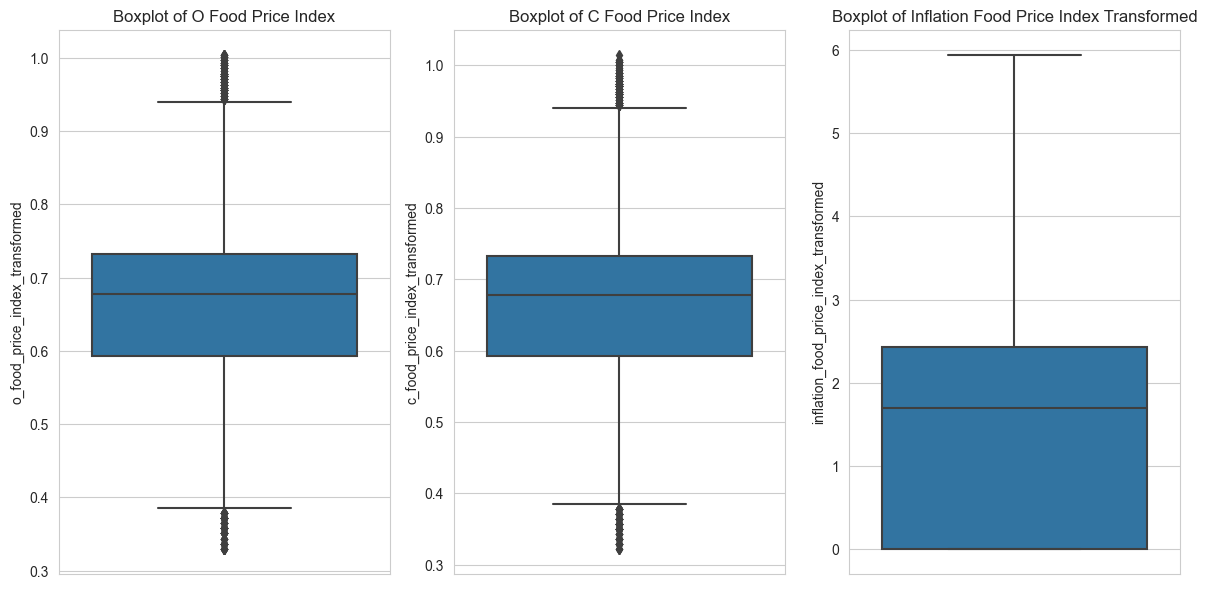

In [8]:
# Handling outliers using IQR method for each of the three columns
# O Food Price Index
Q1_o = food_price_data['o_food_price_index_transformed'].quantile(0.25)
Q3_o = food_price_data['o_food_price_index_transformed'].quantile(0.75)
IQR_o = Q3_o - Q1_o
lower_bound_o = Q1_o - 1.5 * IQR_o
upper_bound_o = Q3_o + 1.5 * IQR_o

# C Food Price Index
Q1_c = food_price_data['c_food_price_index_transformed'].quantile(0.25)
Q3_c = food_price_data['c_food_price_index_transformed'].quantile(0.75)
IQR_c = Q3_c - Q1_c
lower_bound_c = Q1_c - 1.5 * IQR_c
upper_bound_c = Q3_c + 1.5 * IQR_c

# Inflation Food Price Index Transformed
Q1_transformed = food_price_data['inflation_food_price_index_transformed'].quantile(0.25)
Q3_transformed = food_price_data['inflation_food_price_index_transformed'].quantile(0.75)
IQR_transformed = Q3_transformed - Q1_transformed
lower_bound_transformed = Q1_transformed - 1.5 * IQR_transformed
upper_bound_transformed = Q3_transformed + 1.5 * IQR_transformed

# Filter out rows that are outside of the IQR bounds for each column
food_price_data = food_price_data[
    (food_price_data['o_food_price_index_transformed'] >= lower_bound_o) & (food_price_data['o_food_price_index_transformed'] <= upper_bound_o) &
    (food_price_data['c_food_price_index_transformed'] >= lower_bound_c) & (food_price_data['c_food_price_index_transformed'] <= upper_bound_c) &
    (food_price_data['inflation_food_price_index_transformed'] >= lower_bound_transformed) & (food_price_data['inflation_food_price_index_transformed'] <= upper_bound_transformed)
]

# Display the cleaned data after outlier removal
print(food_price_data.head())

# Again check for missing values after handling
print("\nMissing Values in the dataset after cleaning:")
print(food_price_data.isna().sum())

# Plot boxplots for all three columns after outlier removal
plt.figure(figsize=(12, 6))

# Boxplot of O Food Price Index
plt.subplot(1, 3, 1)
sns.boxplot(y=food_price_data['o_food_price_index_transformed'])
plt.title('Boxplot of O Food Price Index')

# Boxplot of C Food Price Index
plt.subplot(1, 3, 2)
sns.boxplot(y=food_price_data['c_food_price_index_transformed'])
plt.title('Boxplot of C Food Price Index')

# Boxplot of Inflation Food Price Index Transformed
plt.subplot(1, 3, 3)
sns.boxplot(y=food_price_data['inflation_food_price_index_transformed'])
plt.title('Boxplot of Inflation Food Price Index Transformed')

plt.tight_layout()
plt.show()


### Analysis Based on the Provided Results and EDA

**Missing Values Handling:**

The missing values in inflation_food_price_index has been successfully handled by filling them with the median of each column. There are no remaining missing values in the dataset after this step.

**Outlier Handling:**

We used the IQR method to detect and remove outliers from all columns. The data has been filtered to retain only those rows within the IQR bounds.Some of the outliers are considered to be extreme cases of inflation.

After filtering, there are no remaining outliers in the target variable, which ensures that our model will not be skewed by extreme values.

#### 1. Distribution Analysis of Food Price Indices:

The first graph provides insight into the distribution of three important variables:

**O Food Price Index Transformed (opening day food price):**

This distribution shows a long-tailed distribution, but there are extreme values (outliers). It indicates that most of the observations for Opening Food Price Index are concentrated near 1.0, but outliers can be found in extreme ranges.

**C Food Price Index Transformed (closing day food price):**

Almost identitcal to O Food Price Index Transformed (opening day food price)

**Inflation Food Price Index Transformed (Inflation in Food Price):**

This distribution is bimodal, with two clear peaks. The first peak around 0 indicates low or negative inflation for many observations, while the second peak suggests a noticeable amount of high inflation observations as well. The inflation food price index ranges is showing the volatility in food price inflation over the years.

#### 2. Trend Analysis of Inflation Food Price Index:

**Overall Trend:**

The trend over the years shows significant volatility. After a sharp rise in 2008, the index declined drastically, indicating significant changes in inflation trends from year to year.

After 2011, food price inflation fluctuates between positive and negative values, highlighting periods of both high and low inflation. This suggests that food prices are affected by various global and local economic conditions, making them unpredictable and sensitive to factors like supply disruptions, market conditions, and government policies.

Between 2020-2022 observed peak inflation and then constant decline.

#### 3. Seasonal Patterns in Inflation Food Price Index:

**Monthly Trend:**

A clear seasonal pattern is identified, with higher inflation observed during the spring months (March-May), and lower inflation from October to December.
This seasonal variation could reflect agricultural production cycles, supply chain issues, and changes in consumer demand.

The analysis suggests that food price inflation is influenced by these periodic fluctuations, and understanding these patterns could be valuable for making future predictions and policy decisions.

#### 4. Boxplot Analysis of Food Price Indices:

**Boxplots of O, C, and Inflation Food Price Indices Transformed:**

The O Food Price Index Transformed has a compact box with some outliers. This indicates that most of the data points fall near the median, but extreme values do exist.

The C Food Price Index Transformed is almost identical to O Food Price Index Transformed

The Inflation Food Price Index Transformed shows the most spread-out distribution, with a wide box and larger fluctuations in values. This highlights the high volatility and wide variation in food price inflation rates across the years.

#### 5. Key Insights and Implications:

The Inflation Food Price Index Transformed is the most volatile of the three indices and exhibits seasonal patterns, making it a challenging but important target variable for prediction.

The O and C Food Price Transformed Indices show more stable distributions but still have some extreme outliers that may be reflecting some exptreme case of inflation.

The Seasonal Patterns reveal that food price inflation fluctuates (a little) but regularly based on time of year, suggesting the need to incorporate seasonal factors into our model.

### Adding Lag:

**Lagged Inflation Values (e.g., inflation_lag_1, inflation_lag_3, inflation_lag_6)
We'll create new columns to store the lagged values. These will be calculated for inflation_food_price_index_transformed.**

In [9]:
# Adding lagged inflation values (lag 1, lag 3, lag 6)
food_price_data['inflation_lag_1'] = food_price_data['inflation_food_price_index_transformed'].shift(1)
food_price_data['inflation_lag_3'] = food_price_data['inflation_food_price_index_transformed'].shift(3)
food_price_data['inflation_lag_6'] = food_price_data['inflation_food_price_index_transformed'].shift(6)

# Display the updated dataset
print("\nFood Price Data with Lagged Inflation Values:")
print(food_price_data[['year', 'month', 'inflation_food_price_index_transformed', 'inflation_lag_1', 'inflation_lag_3', 'inflation_lag_6']].head())

print("\n Dataset")
print(food_price_data.head())


Food Price Data with Lagged Inflation Values:
   year  month  inflation_food_price_index_transformed  inflation_lag_1  \
0  2007      1                                1.744843              NaN   
1  2007      2                                1.744843         1.744843   
2  2007      3                                1.744843         1.744843   
3  2007      4                                1.744843         1.744843   
4  2007      5                                1.744843         1.744843   

   inflation_lag_3  inflation_lag_6  
0              NaN              NaN  
1              NaN              NaN  
2              NaN              NaN  
3         1.744843              NaN  
4         1.744843              NaN  

 Dataset
   o_food_price_index  c_food_price_index  inflation_food_price_index  year  \
0                0.53                0.53                       4.725  2007   
1                0.53                0.54                       4.725  2007   
2                0.54      

In [10]:
# Filling Lag 1 with the first available non-NaN value (first valid value of inflation_food_price_index_transformed)
first_valid_value = food_price_data['inflation_food_price_index_transformed'].dropna().iloc[0]
food_price_data['inflation_lag_1'].fillna(first_valid_value, inplace=True)

# Fill NaN values in inflation_lag_3 and inflation_lag_6 with the mean of the respective columns
food_price_data['inflation_lag_3'].fillna(food_price_data['inflation_lag_3'].mean(), inplace=True)
food_price_data['inflation_lag_6'].fillna(food_price_data['inflation_lag_6'].mean(), inplace=True)

# Display the updated dataset
print("\nFood Price Data with Lagged Inflation Values filled using the new approach:")
print(food_price_data[['year', 'month', 'inflation_food_price_index_transformed', 'inflation_lag_1', 'inflation_lag_3', 'inflation_lag_6']].head())

# Check if NaN values are properly filled
print("\nMissing Values in the dataset after filling:")
print(food_price_data.isna().sum())

print("\n Dataset")
print(food_price_data.head())



Food Price Data with Lagged Inflation Values filled using the new approach:
   year  month  inflation_food_price_index_transformed  inflation_lag_1  \
0  2007      1                                1.744843         1.744843   
1  2007      2                                1.744843         1.744843   
2  2007      3                                1.744843         1.744843   
3  2007      4                                1.744843         1.744843   
4  2007      5                                1.744843         1.744843   

   inflation_lag_3  inflation_lag_6  
0         1.505084         1.504313  
1         1.505084         1.504313  
2         1.505084         1.504313  
3         1.744843         1.504313  
4         1.744843         1.504313  

Missing Values in the dataset after filling:
o_food_price_index                        0
c_food_price_index                        0
inflation_food_price_index                0
year                                      0
month                 

**Lag 1 (inflation_lag_1):** The first valid (non-NaN) value of inflation_food_price_index_transformed is used to fill any missing values in inflation_lag_1. This will ensure that the lag for the first row is filled with the first valid value of inflation.

**Lag 3 and Lag 6 (inflation_lag_3, inflation_lag_6):** These will be filled with the mean of the respective columns, which is the desired approach for lag values without prior data.

### Adding Rolling Average:

Now we will start adding **rolling averages** for inflation_rolling_3 and inflation_rolling_6. Rolling averages are useful for capturing trends and smoothing out short-term fluctuations in time series data.

In [11]:
# Adding rolling averages
food_price_data['inflation_rolling_3'] = food_price_data['inflation_food_price_index_transformed'].rolling(window=3).mean()
food_price_data['inflation_rolling_6'] = food_price_data['inflation_food_price_index_transformed'].rolling(window=6).mean()

# Display the updated dataset with rolling averages
print("\nFood Price Data with Rolling Averages:")
print(food_price_data[['year', 'month', 'inflation_food_price_index_transformed', 'inflation_rolling_3', 'inflation_rolling_6']].head())

# Check for any missing values after adding the rolling averages
print("\nMissing Values in the dataset after adding rolling averages:")
print(food_price_data.isna().sum())

print("\n Dataset")
print(food_price_data.head())



Food Price Data with Rolling Averages:
   year  month  inflation_food_price_index_transformed  inflation_rolling_3  \
0  2007      1                                1.744843                  NaN   
1  2007      2                                1.744843                  NaN   
2  2007      3                                1.744843             1.744843   
3  2007      4                                1.744843             1.744843   
4  2007      5                                1.744843             1.744843   

   inflation_rolling_6  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

Missing Values in the dataset after adding rolling averages:
o_food_price_index                        0
c_food_price_index                        0
inflation_food_price_index                0
year                                      0
month                                     0
DATES                                     0
country  

In [12]:
# Fill missing values for rolling averages using the mean
food_price_data['inflation_rolling_3'].fillna(food_price_data['inflation_rolling_3'].mean(), inplace=True)
food_price_data['inflation_rolling_6'].fillna(food_price_data['inflation_rolling_6'].mean(), inplace=True)

# Display the updated dataset
print("\nFood Price Data with Filled Rolling Averages:")
print(food_price_data[['year', 'month', 'inflation_food_price_index_transformed', 'inflation_rolling_3', 'inflation_rolling_6']].head())

# Check for any missing values after filling
print("\nMissing Values in the dataset after filling rolling averages:")
print(food_price_data.isna().sum())

print("\n Dataset")
print(food_price_data.head())



Food Price Data with Filled Rolling Averages:
   year  month  inflation_food_price_index_transformed  inflation_rolling_3  \
0  2007      1                                1.744843             1.505588   
1  2007      2                                1.744843             1.505588   
2  2007      3                                1.744843             1.744843   
3  2007      4                                1.744843             1.744843   
4  2007      5                                1.744843             1.744843   

   inflation_rolling_6  
0             1.505122  
1             1.505122  
2             1.505122  
3             1.505122  
4             1.505122  

Missing Values in the dataset after filling rolling averages:
o_food_price_index                        0
c_food_price_index                        0
inflation_food_price_index                0
year                                      0
month                                     0
DATES                                     0
c

### Adding seasons column

In [13]:
# Add a 'season' column based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

food_price_data['season'] = food_price_data['month'].apply(get_season)

# Display the dataset with season column
print(food_price_data[['year', 'month', 'season']].head())
print(food_price_data.head())

   year  month  season
0  2007      1  Winter
1  2007      2  Winter
2  2007      3  Spring
3  2007      4  Spring
4  2007      5  Spring
   o_food_price_index  c_food_price_index  inflation_food_price_index  year  \
0                0.53                0.53                       4.725  2007   
1                0.53                0.54                       4.725  2007   
2                0.54                0.54                       4.725  2007   
3                0.54                0.55                       4.725  2007   
4                0.56                0.58                       4.725  2007   

   month      DATES      country  o_food_price_index_transformed  \
0      1 2007-01-01  Afghanistan                        0.425268   
1      2 2007-01-02  Afghanistan                        0.425268   
2      3 2007-01-03  Afghanistan                        0.431782   
3      4 2007-01-04  Afghanistan                        0.431782   
4      5 2007-01-05  Afghanistan               

# Final Food Price Inflation Dataset

In [14]:
print(food_price_data.head())
food_price_data.to_csv('Final Food Price Inflation Dataset.csv', index= False)

   o_food_price_index  c_food_price_index  inflation_food_price_index  year  \
0                0.53                0.53                       4.725  2007   
1                0.53                0.54                       4.725  2007   
2                0.54                0.54                       4.725  2007   
3                0.54                0.55                       4.725  2007   
4                0.56                0.58                       4.725  2007   

   month      DATES      country  o_food_price_index_transformed  \
0      1 2007-01-01  Afghanistan                        0.425268   
1      2 2007-01-02  Afghanistan                        0.425268   
2      3 2007-01-03  Afghanistan                        0.431782   
3      4 2007-01-04  Afghanistan                        0.431782   
4      5 2007-01-05  Afghanistan                        0.444686   

   c_food_price_index_transformed  inflation_food_price_index_transformed  \
0                        0.425268      

# Loading Dataset WDI

In [15]:
# Path to the WDI dataset
wdi_file_path = './FI_Data/P_Data_Extract_From_World_Development_Indicators/data.csv'

# Load the dataset
wdi_df = pd.read_csv(wdi_file_path)

# Display the first few rows of the dataset to inspect its structure
print("First Few Rows of the WDI Dataset:")
print(wdi_df.head())

# Display the column names to understand the available features
print("\nColumns in the WDI Dataset:")
print(wdi_df.columns)

# Check the date range for alignment with food inflation data (2007–2015)
print("\nUnique Years in the WDI Dataset:")
if 'year' in wdi_df.columns:
    print(wdi_df['year'].unique())
else:
    print("No 'year' column detected. Verify time-related features.")

# Check for missing values in the dataset
print("\nMissing Values Per Column in the WDI Dataset:")
print(wdi_df.isnull().sum())


First Few Rows of the WDI Dataset:
  Country Name Country Code  \
0    Argentina          ARG   
1    Argentina          ARG   
2    Argentina          ARG   
3    Argentina          ARG   
4    Argentina          ARG   

                                         Series Name     Series Code  \
0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
1  Agriculture, forestry, and fishing, value adde...  NV.AGR.TOTL.ZS   
2  Annual freshwater withdrawals, total (% of int...  ER.H2O.FWTL.ZS   
3  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
4  Contraceptive prevalence, any method (% of mar...  SP.DYN.CONU.ZS   

  2007 [YR2007] 2008 [YR2008] 2009 [YR2009] 2010 [YR2010] 2011 [YR2011]  \
0        66.424        66.149        66.695        67.064        68.264   
1   7.452353946   7.318954597   5.273623469   7.132167451    6.99873377   
2   11.99517435   12.22311877    12.4510632   12.67900763   12.90753425   
3          99.4          94.8          97.9  

In [16]:
# Replace '..' with NaN
wdi_df.replace('..', pd.NA, inplace=True)

# Check the first few rows to see the changes
print("\nFirst Few Rows After Replacing '..' with NaN:")
print(wdi_df.head())

# Check for missing values again after replacement
print("\nMissing Values Per Column After Replacement:")
print(wdi_df.isnull().sum())



First Few Rows After Replacing '..' with NaN:
  Country Name Country Code  \
0    Argentina          ARG   
1    Argentina          ARG   
2    Argentina          ARG   
3    Argentina          ARG   
4    Argentina          ARG   

                                         Series Name     Series Code  \
0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
1  Agriculture, forestry, and fishing, value adde...  NV.AGR.TOTL.ZS   
2  Annual freshwater withdrawals, total (% of int...  ER.H2O.FWTL.ZS   
3  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
4  Contraceptive prevalence, any method (% of mar...  SP.DYN.CONU.ZS   

  2007 [YR2007] 2008 [YR2008] 2009 [YR2009] 2010 [YR2010] 2011 [YR2011]  \
0        66.424        66.149        66.695        67.064        68.264   
1   7.452353946   7.318954597   5.273623469   7.132167451    6.99873377   
2   11.99517435   12.22311877    12.4510632   12.67900763   12.90753425   
3          99.4          94.8    

In [17]:
# Remove rows with missing values (NaN)
wdi_df_cleaned = wdi_df.dropna()

# Display the cleaned dataset
print("\nCleaned WDI Dataset After Removing Rows with NaN Values:")
print(wdi_df_cleaned.head())

# Check for missing values again
print("\nMissing Values After Cleaning:")
print(wdi_df_cleaned.isna().sum())



Cleaned WDI Dataset After Removing Rows with NaN Values:
   Country Name Country Code  \
1     Argentina          ARG   
8     Argentina          ARG   
11    Argentina          ARG   
13    Argentina          ARG   
14    Argentina          ARG   

                                          Series Name        Series Code  \
1   Agriculture, forestry, and fishing, value adde...     NV.AGR.TOTL.ZS   
8            Exports of goods and services (% of GDP)     NE.EXP.GNFS.ZS   
11  Foreign direct investment, net inflows (BoP, c...  BX.KLT.DINV.CD.WD   
13                                  GDP (current US$)     NY.GDP.MKTP.CD   
14                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   

   2007 [YR2007] 2008 [YR2008] 2009 [YR2009] 2010 [YR2010] 2011 [YR2011]  \
1    7.452353946   7.318954597   5.273623469   7.132167451    6.99873377   
8    22.66275031   22.06090038   19.56098506   18.93382341   18.44920915   
11    6473157762    9725553130    4017158925   11332718626   108

#### WDI Data Preparation:

**Filter for relevant indicators:** We'll filter the dataset for the following key indicators:

GDP (current US$)

Tax revenue (percentage of GDP)

Total debt service (percentage of exports of goods, services, and primary income)

**Reshape the data to long format:**

We will reshape the dataset to a long format where each indicator (GDP, Tax revenue, Debt service) is represented as a single row for each year and country.

**Handle missing values:** 

We will check for missing values in the selected columns and decide whether to fill or drop them.

**Ensure data consistency:**

We'll make sure the Country Code and Year columns are consistent with the food price dataset to enable proper merging.

In [18]:
# Check for missing values in the dataset
print("\nMissing Values Per Column in the WDI Dataset:")
print(wdi_df.isnull().sum())

# Filter for relevant indicators
relevant_indicators = [
    "GDP (current US$)",
    "Tax revenue (% of GDP)",
    "Total debt service (% of exports of goods, services and primary income)"
]

# Filter the WDI dataset to retain only the relevant indicators
filtered_wdi = wdi_df[wdi_df['Series Name'].isin(relevant_indicators)]

# Reshape the dataset to long format
wdi_long = filtered_wdi.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name'],
    var_name='Year',
    value_name='Value'
)

# Display the reshaped WDI dataset
print("\nReshaped WDI Dataset:")
print(wdi_long.head())

# Check for missing values after reshaping
print("\nMissing Values After Reshaping:")
print(wdi_long.isnull().sum())




Missing Values Per Column in the WDI Dataset:
Country Name        3
Country Code        5
Series Name         5
Series Code         5
2007 [YR2007]    3785
2008 [YR2008]    3732
2009 [YR2009]    3649
2010 [YR2010]    3477
2011 [YR2011]    3529
2012 [YR2012]    3484
2013 [YR2013]    3505
2014 [YR2014]    3352
2015 [YR2015]    3685
2016 [YR2016]    3492
2017 [YR2017]    3545
2018 [YR2018]    3512
2019 [YR2019]    3509
2020 [YR2020]    3955
2021 [YR2021]    4120
2022 [YR2022]    5923
2023 [YR2023]    9192
dtype: int64

Reshaped WDI Dataset:
  Country Name Country Code  \
0    Argentina          ARG   
1    Argentina          ARG   
2    Argentina          ARG   
3    Australia          AUS   
4    Australia          AUS   

                                         Series Name         Year  \
0                                  GDP (current US$)  Series Code   
1                             Tax revenue (% of GDP)  Series Code   
2  Total debt service (% of exports of goods, ser...  Series 

In [19]:
# Pivot the dataset so that each indicator becomes a separate column
wdi_pivot = wdi_long.pivot_table(index=['Country Name', 'Country Code', 'Year'],
                                 columns='Series Name',
                                 values='Value',
                                 aggfunc='first')

# Reset the index to make 'Country Name', 'Country Code', and 'Year' columns
wdi_pivot.reset_index(inplace=True)

# Display the pivoted dataset
print("\nPivoted WDI Dataset:")
print(wdi_pivot.head())

# Check for missing values in the pivoted WDI dataset
print("\nMissing Values After Pivoting:")
print(wdi_pivot.isnull().sum())

# Check if 'Year' column is in the desired YYYY format
print("\nUnique Years in the Pivoted WDI Dataset:")
print(wdi_pivot['Year'].unique())



Pivoted WDI Dataset:
Series Name Country Name Country Code           Year GDP (current US$)  \
0            Afghanistan          AFG  2007 [YR2007]        9747886187   
1            Afghanistan          AFG  2008 [YR2008]       10109297048   
2            Afghanistan          AFG  2009 [YR2009]       12416152732   
3            Afghanistan          AFG  2010 [YR2010]       15856668556   
4            Afghanistan          AFG  2011 [YR2011]       17805098206   

Series Name Tax revenue (% of GDP)  \
0                      5.283456604   
1                       6.08796493   
2                      8.481758361   
3                      9.169751919   
4                      8.916793996   

Series Name Total debt service (% of exports of goods, services and primary income)  
0                                                  0.113481635                       
1                                                  0.402819293                       
2                                             

In [20]:
# Ensure 'Year' is treated as a string
wdi_pivot['Year'] = wdi_pivot['Year'].astype(str)

# Clean the 'Year' column to extract the numeric year (YYYY format)
wdi_pivot['Year'] = wdi_pivot['Year'].str.extract(r'(\d{4})')

# Check for any NaN values in the 'Year' column and handle them
wdi_pivot['Year'].fillna(0, inplace=True)  # Fill NaN values with 0 or any other logic

# Convert to integer type
wdi_pivot['Year'] = wdi_pivot['Year'].astype(int)

# Verify that the 'Year' column has been cleaned
print("\nCleaned Pivoted WDI Dataset:")
print(wdi_pivot.head())

# Check the unique years after cleaning
print("\nUnique Years in the Cleaned Pivoted WDI Dataset:")
print(wdi_pivot['Year'].unique())



Cleaned Pivoted WDI Dataset:
Series Name Country Name Country Code  Year GDP (current US$)  \
0            Afghanistan          AFG  2007        9747886187   
1            Afghanistan          AFG  2008       10109297048   
2            Afghanistan          AFG  2009       12416152732   
3            Afghanistan          AFG  2010       15856668556   
4            Afghanistan          AFG  2011       17805098206   

Series Name Tax revenue (% of GDP)  \
0                      5.283456604   
1                       6.08796493   
2                      8.481758361   
3                      9.169751919   
4                      8.916793996   

Series Name Total debt service (% of exports of goods, services and primary income)  
0                                                  0.113481635                       
1                                                  0.402819293                       
2                                                  0.487686263                       
3     

In [21]:
# Remove rows where the 'Year' is 0
wdi_pivot = wdi_pivot[wdi_pivot['Year'] != 0]

# Verify that the 'Year' column no longer contains 0
print("\nUnique Years in the Cleaned Pivoted WDI Dataset After Removal:")
print(wdi_pivot['Year'].unique())

# Display the cleaned dataset again
print("\nCleaned Pivoted WDI Dataset (After Removing Invalid Years):")
print(wdi_pivot.head())



Unique Years in the Cleaned Pivoted WDI Dataset After Removal:
[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023]

Cleaned Pivoted WDI Dataset (After Removing Invalid Years):
Series Name Country Name Country Code  Year GDP (current US$)  \
0            Afghanistan          AFG  2007        9747886187   
1            Afghanistan          AFG  2008       10109297048   
2            Afghanistan          AFG  2009       12416152732   
3            Afghanistan          AFG  2010       15856668556   
4            Afghanistan          AFG  2011       17805098206   

Series Name Tax revenue (% of GDP)  \
0                      5.283456604   
1                       6.08796493   
2                      8.481758361   
3                      9.169751919   
4                      8.916793996   

Series Name Total debt service (% of exports of goods, services and primary income)  
0                                                  0.113481635                   

In [22]:
# Display the first few rows of the cleaned WDI dataset to inspect its structure
print("\nCleaned WDI Dataset (with all columns):")
print(wdi_pivot.head())

# Optionally, check the column names to ensure all relevant columns are included
print("\nColumns in the WDI Dataset:")
print(wdi_pivot.columns)

# Display the summary of the dataset to inspect data types and check for any remaining issues
print("\nWDI Dataset Info:")
print(wdi_pivot.info())

# Display the cleaned WDI dataset after all transformations and missing value handling
print("\nFinal Cleaned WDI Dataset:")
print(wdi_pivot.head())



Cleaned WDI Dataset (with all columns):
Series Name Country Name Country Code  Year GDP (current US$)  \
0            Afghanistan          AFG  2007        9747886187   
1            Afghanistan          AFG  2008       10109297048   
2            Afghanistan          AFG  2009       12416152732   
3            Afghanistan          AFG  2010       15856668556   
4            Afghanistan          AFG  2011       17805098206   

Series Name Tax revenue (% of GDP)  \
0                      5.283456604   
1                       6.08796493   
2                      8.481758361   
3                      9.169751919   
4                      8.916793996   

Series Name Total debt service (% of exports of goods, services and primary income)  
0                                                  0.113481635                       
1                                                  0.402819293                       
2                                                  0.487686263                   

# Final Structure of the WDI Dataset:

**Columns:**

Country Name: Country names.

Country Code: Country codes.

Year: Year of the data (in YYYY format).

GDP (current US$): Gross Domestic Product.

Tax revenue (% of GDP): Tax revenue as a percentage of GDP.

Total debt service (% of exports of goods, services, and primary income): Debt service as a percentage of exports.

**Data Types:**

Country Name and Country Code: Object (string).

Year: Integer.

GDP (current US$), Tax revenue (% of GDP), and Total debt service (% of exports of goods, services, and primary income): Float.




**Note: we selected these features after taking advice from some experts in finance department and research on inflation**

In [23]:
# Check for any missing values in the final cleaned WDI dataset
print("\nMissing Values After Cleaning:")
print(wdi_pivot.isnull().sum())

# Inspect rows with NaN values in the WDI dataset
nan_rows = wdi_pivot[wdi_pivot.isnull().any(axis=1)]

# Display rows with NaN values to understand their significance
print("\nRows with NaN values in the WDI dataset:")
print(nan_rows)

# Optionally, check which columns contain NaN values in these rows
print("\nColumns with NaN values in the rows above:")
print(nan_rows.isnull().sum())



Missing Values After Cleaning:
Series Name
Country Name                                                                  0
Country Code                                                                  0
Year                                                                          0
GDP (current US$)                                                             3
Tax revenue (% of GDP)                                                     1768
Total debt service (% of exports of goods, services and primary income)    2284
dtype: int64

Rows with NaN values in the WDI dataset:
Series Name Country Name Country Code  Year GDP (current US$)  \
11           Afghanistan          AFG  2018       18053222687   
12           Afghanistan          AFG  2019       18799444490   
13           Afghanistan          AFG  2020       19955929052   
14           Afghanistan          AFG  2021       14266499430   
15           Afghanistan          AFG  2022       14502158192   
...                  ...       

In [24]:
# Convert object columns to numeric (float)
columns_to_convert = ['GDP (current US$)',
                      'Tax revenue (% of GDP)',
                      'Total debt service (% of exports of goods, services and primary income)']

for col in columns_to_convert:
    wdi_pivot[col] = pd.to_numeric(wdi_pivot[col], errors='coerce')

# Fill missing values with the median of each column
wdi_pivot['GDP (current US$)'].fillna(wdi_pivot['GDP (current US$)'].median(), inplace=True)
wdi_pivot['Tax revenue (% of GDP)'].fillna(wdi_pivot['Tax revenue (% of GDP)'].median(), inplace=True)
wdi_pivot['Total debt service (% of exports of goods, services and primary income)'].fillna(
    wdi_pivot['Total debt service (% of exports of goods, services and primary income)'].median(), inplace=True)

# Check if the missing values are filled
print("\nMissing Values After Filling:")
print(wdi_pivot.isnull().sum())

# Format the output to match the desired style
pd.options.display.float_format = '{:.6f}'.format  # Show floats up to six decimals
pd.options.display.max_columns = None  # Ensure all columns are displayed

# Display the cleaned data
print("\nCleaned WDI Dataset After Filling Missing Values:")
print(wdi_pivot.head())



Missing Values After Filling:
Series Name
Country Name                                                               0
Country Code                                                               0
Year                                                                       0
GDP (current US$)                                                          0
Tax revenue (% of GDP)                                                     0
Total debt service (% of exports of goods, services and primary income)    0
dtype: int64

Cleaned WDI Dataset After Filling Missing Values:
Series Name Country Name Country Code  Year  GDP (current US$)  \
0            Afghanistan          AFG  2007  9747886187.000000   
1            Afghanistan          AFG  2008 10109297048.000000   
2            Afghanistan          AFG  2009 12416152732.000000   
3            Afghanistan          AFG  2010 15856668556.000000   
4            Afghanistan          AFG  2011 17805098206.000000   

Series Name  Tax revenue (% of GDP

In [25]:
wdi_pivot.to_csv('wdi_pivot.csv', index= False)

# Merging Both the Dataset

In [26]:
# Check the columns in both datasets to verify the 'Year' column
print("\nColumns in Food Price Data:")
print(food_price_data.columns)

print("\nColumns in WDI Data:")
print(wdi_pivot.columns)


Columns in Food Price Data:
Index(['o_food_price_index', 'c_food_price_index',
       'inflation_food_price_index', 'year', 'month', 'DATES', 'country',
       'o_food_price_index_transformed', 'c_food_price_index_transformed',
       'inflation_food_price_index_transformed', 'inflation_lag_1',
       'inflation_lag_3', 'inflation_lag_6', 'inflation_rolling_3',
       'inflation_rolling_6', 'season'],
      dtype='object')

Columns in WDI Data:
Index(['Country Name', 'Country Code', 'Year', 'GDP (current US$)',
       'Tax revenue (% of GDP)',
       'Total debt service (% of exports of goods, services and primary income)'],
      dtype='object', name='Series Name')


In [27]:
# Strip leading and trailing spaces in 'Country Name' for both datasets
food_price_data['Country Name'] = food_price_data['country'].str.strip().str.title()
wdi_pivot['Country Name'] = wdi_pivot['Country Name'].str.strip().str.title()

# Ensure 'Year' column is of type integer in both datasets
food_price_data['Year'] = food_price_data['year'].astype(int)
wdi_pivot['Year'] = wdi_pivot['Year'].astype(int)

# Re-check common countries between the two datasets
food_countries = food_price_data['Country Name'].unique()
wdi_countries = wdi_pivot['Country Name'].unique()

common_countries = set(food_countries).intersection(set(wdi_countries))

print("\nCommon Countries between Food Price Data and WDI Data:")
print(common_countries)

# Re-check common years
food_years = food_price_data['Year'].unique()
wdi_years = wdi_pivot['Year'].unique()

common_years = set(food_years).intersection(set(wdi_years))

print("\nCommon Years between Food Price Data and WDI Data:")
print(common_years)

# Now perform the merge using 'Country Name' and 'Year'
final_data = pd.merge(food_price_data, wdi_pivot, how='left', on=['Country Name', 'Year'])

# Display the merged dataset
print("\nFinal Merged Dataset:")
print(final_data.head())

# Check for any missing values after merging
print("\nMissing Values After Merging:")
print(final_data.isnull().sum())

# Verify the structure of the merged dataset
print("\nMerged Dataset Info:")
print(final_data.info())



Common Countries between Food Price Data and WDI Data:
{'Indonesia', 'Mali', 'Mozambique', 'Somalia', 'Syrian Arab Republic', 'Afghanistan', 'Lebanon', 'Guinea-Bissau', 'Malawi', 'Philippines', 'Central African Republic', 'Niger', 'Guinea', 'Iraq', 'Chad', 'Yemen, Rep.', 'Sri Lanka', 'Libya', 'Haiti', 'Lao Pdr', 'Senegal', 'Bangladesh', 'Mauritania', 'Myanmar', 'Kenya', 'Burkina Faso', 'Burundi', 'Liberia', 'South Sudan', 'Gambia, The', 'Armenia', 'Congo, Dem. Rep.', 'Sudan', 'Nigeria', 'Congo, Rep.', 'Cameroon'}

Common Years between Food Price Data and WDI Data:
{2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}

Final Merged Dataset:
   o_food_price_index  c_food_price_index  inflation_food_price_index  year  \
0            0.530000            0.530000                    4.725000  2007   
1            0.530000            0.540000                    4.725000  2007   
2            0.540000            0.540000                    4.72

# Summary of Merged Dataset

#### **Column Adjustments:**
- The column names were standardized to ensure consistency between the food price data and the WDI dataset:
  - The `country` column in the food price data was renamed to `Country Name`.
  - The `year` column in the food price data was renamed to `Year`.

#### **Data Matching:**
- The datasets were merged using the common columns: `Country Name` and `Year`.
- This merge allows food price inflation data to be analyzed alongside macroeconomic indicators such as GDP, tax revenue, and debt service.

#### **Merge Type:**
- A **left join** (`how='left'`) was used for merging:
  - Ensures all rows from the food price data are retained.
  - Adds corresponding rows from the WDI dataset where matching data is available.

#### **Data Inspection:**
- **Food Price Data:** No missing values were identified in food price-related columns.
- **Economic Indicators:** Missing values were identified in the following columns:
  - `Country Code`
  - `GDP (current US$)`
  - `Tax revenue (% of GDP)`
  - `Total debt service (% of exports of goods, services, and primary income)`
  - Each of these columns has 313 missing values due to unavailable WDI data for certain countries.

#### **Merged Dataset Overview:**
- The final merged dataset contains **6,508 rows** and **22 columns**, covering food price indices and economic indicators for **36 countries** over the years **2007-2023**.

- How we got 6,508 rows:

In 36 countries have food price data from 2007 to 2023 (17 years), this results in:

**36 countries × 17 years × 12 months = 7,344 rows (theoretical max).**

Some rows are missing due to incomplete monthly data, leading to the observed 6,508 rows.

- Key columns include:
  - **Food Price Data:** Original and transformed indices, inflation rates, and rolling averages.
  - **Economic Indicators:** GDP, tax revenue, and debt service.

#### **Handling Missing Values:**
- Missing values were primarily observed in economic indicator columns:
  - Likely due to countries for which WDI data was not available.
  - Food price-related columns have no missing values, ensuring their reliability for analysis.

#### **Significance of the Merged Dataset:**
- The dataset provides a comprehensive view of food price trends alongside macroeconomic indicators.
- Enables the exploration of relationships between food inflation and economic factors, offering insights into how factors like GDP, tax revenue, and debt service correlate with food price dynamics across regions and years.

#### **Final Observations:**
- The merged dataset ensures that food price indices are fully retained, even for countries or years where economic indicators are unavailable.
- The inclusion of both temporal and macroeconomic data positions the dataset for robust analysis of food price inflation trends and their economic drivers.

# Data Transformation on merged data

In [28]:
# Drop the 'Country Code' column as it's not necessary for analysis
final_data.drop(columns=['Country Code'], inplace=True, errors='ignore')

# Recheck the dataset columns
print("\nColumns After Dropping Irrelevant Columns:")
print(final_data.columns)



Columns After Dropping Irrelevant Columns:
Index(['o_food_price_index', 'c_food_price_index',
       'inflation_food_price_index', 'year', 'month', 'DATES', 'country',
       'o_food_price_index_transformed', 'c_food_price_index_transformed',
       'inflation_food_price_index_transformed', 'inflation_lag_1',
       'inflation_lag_3', 'inflation_lag_6', 'inflation_rolling_3',
       'inflation_rolling_6', 'season', 'Country Name', 'Year',
       'GDP (current US$)', 'Tax revenue (% of GDP)',
       'Total debt service (% of exports of goods, services and primary income)'],
      dtype='object')


In [29]:
# Convert columns to numeric (force errors to NaN)
final_data['GDP (current US$)'] = pd.to_numeric(final_data['GDP (current US$)'], errors='coerce')
final_data['Tax revenue (% of GDP)'] = pd.to_numeric(final_data['Tax revenue (% of GDP)'], errors='coerce')
final_data['Total debt service (% of exports of goods, services and primary income)'] = pd.to_numeric(final_data['Total debt service (% of exports of goods, services and primary income)'], errors='coerce')


print("\nMerged Dataset Info:")
print(final_data.info())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6508 entries, 0 to 6507
Data columns (total 21 columns):
 #   Column                                                                   Non-Null Count  Dtype         
---  ------                                                                   --------------  -----         
 0   o_food_price_index                                                       6508 non-null   float64       
 1   c_food_price_index                                                       6508 non-null   float64       
 2   inflation_food_price_index                                               6508 non-null   float64       
 3   year                                                                     6508 non-null   int64         
 4   month                                                                    6508 non-null   int64         
 5   DATES                                                                    6508 non-null   datetime64[ns]

In [30]:
# Fill missing values with the median of each column
final_data['GDP (current US$)'].fillna(final_data['GDP (current US$)'].median(), inplace=True)
final_data['Tax revenue (% of GDP)'].fillna(final_data['Tax revenue (% of GDP)'].median(), inplace=True)
final_data['Total debt service (% of exports of goods, services and primary income)'].fillna(
    final_data['Total debt service (% of exports of goods, services and primary income)'].median(), inplace=True)

# checking missing values
print(final_data.isnull().sum())

o_food_price_index                                                         0
c_food_price_index                                                         0
inflation_food_price_index                                                 0
year                                                                       0
month                                                                      0
DATES                                                                      0
country                                                                    0
o_food_price_index_transformed                                             0
c_food_price_index_transformed                                             0
inflation_food_price_index_transformed                                     0
inflation_lag_1                                                            0
inflation_lag_3                                                            0
inflation_lag_6                                                            0

# Outlier detection after merging

In [31]:
# Check for outliers using the IQR method
for column in numeric_columns:
    Q1 = final_data[column].quantile(0.25)
    Q3 = final_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    iqr_outliers = final_data[(final_data[column] < lower_bound) | (final_data[column] > upper_bound)]

    print(f"Outliers based on IQR in {column}:")
    print(iqr_outliers)
    print("\n")


Outliers based on IQR in o_food_price_index:
      o_food_price_index  c_food_price_index  inflation_food_price_index  \
186             1.550000            1.520000                   27.250000   
187             1.530000            1.540000                   25.400000   
188             1.560000            1.540000                   23.370000   
189             1.550000            1.540000                   18.730000   
190             1.530000            1.530000                   16.150000   
...                  ...                 ...                         ...   
6503            1.620000            1.690000                   23.390000   
6504            1.710000            1.720000                   29.130000   
6505            1.730000            1.680000                   25.530000   
6506            1.670000            1.690000                   24.670000   
6507            1.710000            1.720000                   24.810000   

      year  month      DATES      country 

**Outliers in o_food_price_index transformed:** There are values in this column that are higher than expected, with extreme inflation values such as 20.23 and 28.21. These may represent unusual spikes in food price indices.

**Outliers in c_food_price_index transformed:** Similar patterns are observed, with certain rows exhibiting extremely high values (like 28.21 and 16.15) for the c_food_price_index.

### Analysing outliers

In [32]:
# Check summary statistics for transformed food price index columns
print("\nSummary statistics for transformed columns:")
print(final_data[['o_food_price_index_transformed', 'c_food_price_index_transformed', 'inflation_food_price_index_transformed']].describe())

# Check for rows with extreme values in transformed columns
extreme_values_o = final_data[final_data['o_food_price_index_transformed'] < 0.01]  # Adjust threshold if needed
extreme_values_c = final_data[final_data['c_food_price_index_transformed'] < 0.01]
extreme_values_inflation = final_data[final_data['inflation_food_price_index_transformed'] < 0.01]

# Display these extreme rows
print("\nRows with extreme values in 'o_food_price_index_transformed':")
print(extreme_values_o)

print("\nRows with extreme values in 'c_food_price_index_transformed':")
print(extreme_values_c)

print("\nRows with extreme values in 'inflation_food_price_index_transformed':")
print(extreme_values_inflation)

# Check years and seasons where extreme values are present
print("\nYears and Seasons with extreme values in 'o_food_price_index_transformed':")
print(extreme_values_o[['Year', 'season']].drop_duplicates())

print("\nYears and Seasons with extreme values in 'c_food_price_index_transformed':")
print(extreme_values_c[['Year', 'season']].drop_duplicates())

print("\nYears and Seasons with extreme values in 'inflation_food_price_index_transformed':")
print(extreme_values_inflation[['Year', 'season']].drop_duplicates())



Summary statistics for transformed columns:
       o_food_price_index_transformed  c_food_price_index_transformed  \
count                     6508.000000                     6508.000000   
mean                         0.667579                        0.667876   
std                          0.126139                        0.126342   
min                          0.329304                        0.322083   
25%                          0.593327                        0.593327   
50%                          0.678034                        0.678034   
75%                          0.732368                        0.732368   
max                          1.004302                        1.015231   

       inflation_food_price_index_transformed  
count                             6508.000000  
mean                                 1.505892  
std                                  1.216197  
min                                  0.000001  
25%                                  0.000001  
50%      

**Interpretation:**

The extreme values in the inflation_food_price_index_transformed column, which are extremely close to zero, could represent either data entry errors or special cases where inflation was negligible or zero for some months.
Since no extreme values were found for the o_food_price_index_transformed and c_food_price_index_transformed columns, it suggests that the food price indices for these columns are more stable and do not have similarly suspicious or erroneous data points.


In [33]:
final_data.to_csv('final_data.csv', index=False)

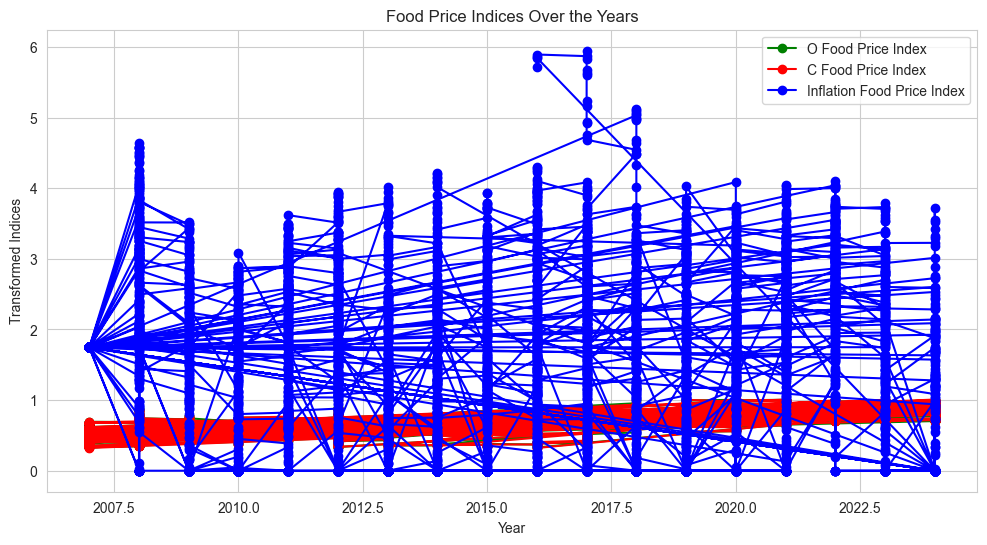

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(final_data['Year'], final_data['o_food_price_index_transformed'], marker='o', linestyle='-', color='g', label='O Food Price Index')
plt.plot(final_data['Year'], final_data['c_food_price_index_transformed'], marker='o', linestyle='-', color='r', label='C Food Price Index')
plt.plot(final_data['Year'], final_data['inflation_food_price_index_transformed'], marker='o', linestyle='-', color='b', label='Inflation Food Price Index')
plt.title('Food Price Indices Over the Years')
plt.xlabel('Year')
plt.ylabel('Transformed Indices')
plt.legend()
plt.grid(True)
plt.show()


# Feature selection

In [35]:
# Check the column names in final_data
print(final_data.columns)

# Update the columns_to_drop if necessary
columns_to_drop = ['year', 'month', 'DATES', 'country', 'season', 'Country Name', 'Year', 'inflation_food_price_index']

# Drop unnecessary columns
final_data_updated = final_data.drop(columns=columns_to_drop, errors='ignore')  # 'ignore' will prevent errors for missing columns

# Now, split the data into X (features) and y (target)
X = final_data_updated
y = final_data['inflation_food_price_index_transformed']

# Display the selected features to verify
print(X.columns)


Index(['o_food_price_index', 'c_food_price_index',
       'inflation_food_price_index', 'year', 'month', 'DATES', 'country',
       'o_food_price_index_transformed', 'c_food_price_index_transformed',
       'inflation_food_price_index_transformed', 'inflation_lag_1',
       'inflation_lag_3', 'inflation_lag_6', 'inflation_rolling_3',
       'inflation_rolling_6', 'season', 'Country Name', 'Year',
       'GDP (current US$)', 'Tax revenue (% of GDP)',
       'Total debt service (% of exports of goods, services and primary income)'],
      dtype='object')
Index(['o_food_price_index', 'c_food_price_index',
       'o_food_price_index_transformed', 'c_food_price_index_transformed',
       'inflation_food_price_index_transformed', 'inflation_lag_1',
       'inflation_lag_3', 'inflation_lag_6', 'inflation_rolling_3',
       'inflation_rolling_6', 'GDP (current US$)', 'Tax revenue (% of GDP)',
       'Total debt service (% of exports of goods, services and primary income)'],
      dtype='object


Missing values in features and target:
o_food_price_index                                                         0
c_food_price_index                                                         0
o_food_price_index_transformed                                             0
c_food_price_index_transformed                                             0
inflation_food_price_index_transformed                                     0
inflation_lag_1                                                            0
inflation_lag_3                                                            0
inflation_lag_6                                                            0
inflation_rolling_3                                                        0
inflation_rolling_6                                                        0
GDP (current US$)                                                          0
Tax revenue (% of GDP)                                                     0
Total debt service (% of exports of 

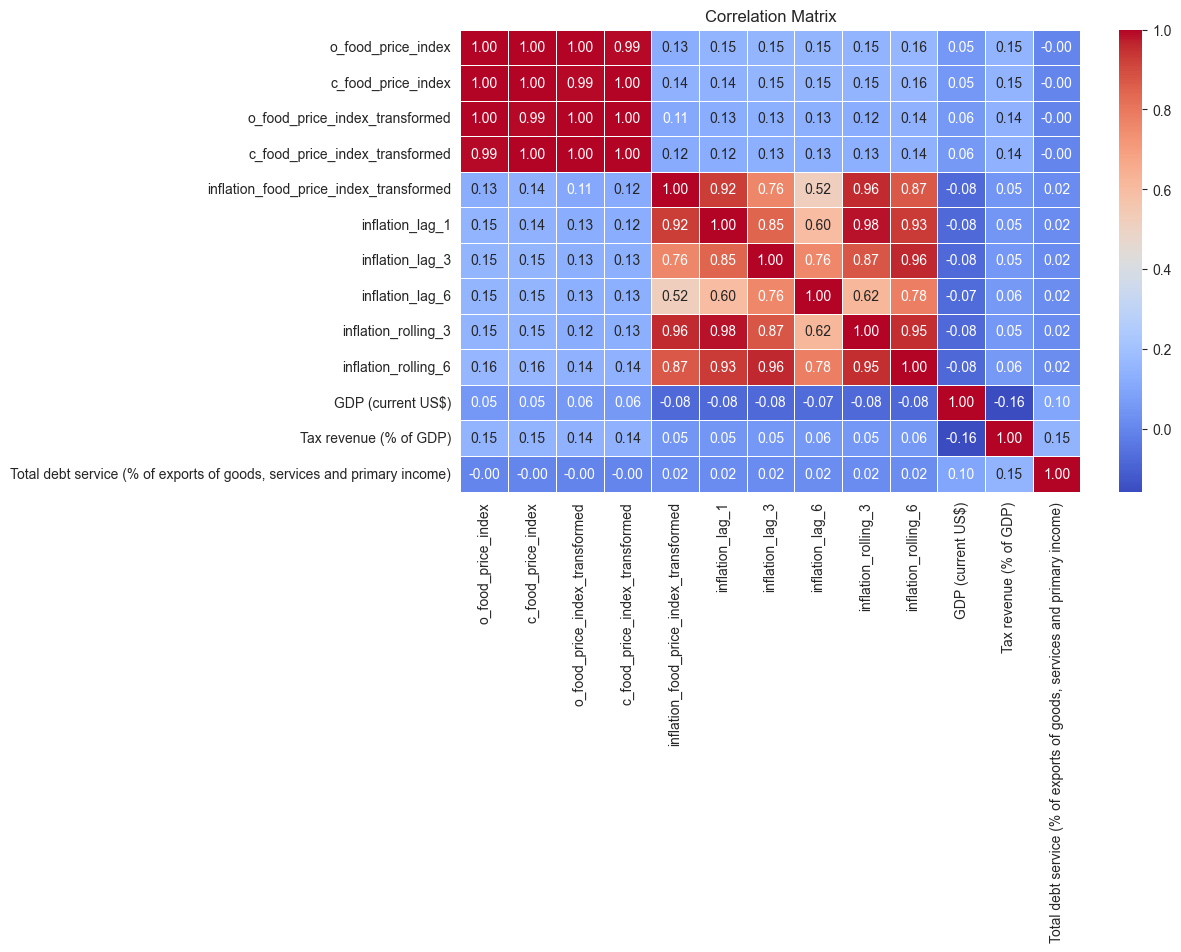


Correlation with Target:
inflation_food_price_index_transformed                                     1.000000
inflation_rolling_3                                                        0.956344
inflation_lag_1                                                            0.924266
inflation_rolling_6                                                        0.870533
inflation_lag_3                                                            0.760572
inflation_lag_6                                                            0.517113
c_food_price_index                                                         0.138807
o_food_price_index                                                         0.126939
c_food_price_index_transformed                                             0.118384
o_food_price_index_transformed                                             0.106733
Tax revenue (% of GDP)                                                     0.049768
Total debt service (% of exports of goods, service

In [36]:
# Step 1: Drop irrelevant columns (including target column)
columns_to_drop = ['year', 'month', 'DATES', 'country', 'season', 'Country Name', 'Year', 'inflation_food_price_index']
X = final_data.drop(columns=columns_to_drop)  # Features for training
y = final_data['inflation_food_price_index_transformed']  # Target variable

# Step 2: Check missing values (if any)
print("\nMissing values in features and target:")
print(X.isnull().sum())
print(y.isnull().sum())

# Step 3: Correlation Matrix (Filter features with strong correlation to the target)
correlation_matrix = X.corr()
target_correlation = correlation_matrix['inflation_food_price_index_transformed'].sort_values(ascending=False)

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Print the correlation values of each feature with respect to the target
print("\nCorrelation with Target:")
print(target_correlation)

# Step 4: Univariate Feature Selection (f-regression)
selector = SelectKBest(f_regression, k='all')  # You can specify 'k' for top k features
selector.fit(X, y)

# Get scores for each feature
univariate_scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
univariate_scores = univariate_scores.sort_values(by='Score', ascending=False)

# Print the feature scores from univariate selection
print("\nUnivariate Feature Scores:")
print(univariate_scores)

# Step 5: Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Get feature importances from Random Forest
rf_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

# Print the feature importance scores from Random Forest
print("\nRandom Forest Feature Importance:")
print(rf_importance)

# Step 6: Combine the selected features from all three methods
top_correlation_features = target_correlation.head(5).index.tolist()
top_univariate_features = univariate_scores.head(5).index.tolist()
top_rf_features = rf_importance.head(5).Feature.tolist()

# Combine selected features from all methods
selected_features = list(set(top_correlation_features + top_univariate_features + top_rf_features))


# Step 7: Final feature set for model training (drop target column)
X_selected = X[selected_features]

# Step 8: Rank the features based on their importance across all three methods
# Assign ranks and combine them
feature_ranking = pd.DataFrame({
    'Feature': selected_features,
    'Correlation Rank': target_correlation[selected_features].rank(ascending=False),
    'Univariate Rank': univariate_scores.loc[selected_features, 'Score'].rank(ascending=False),
    'RF Rank': rf_importance.set_index('Feature').loc[selected_features, 'Importance'].rank(ascending=False)
})

# Sum the ranks to get a combined ranking (lower sum = higher importance)
feature_ranking['Combined Rank'] = feature_ranking[['Correlation Rank', 'Univariate Rank', 'RF Rank']].sum(axis=1)

# Sort features by combined rank
feature_ranking = feature_ranking.sort_values(by='Combined Rank')

print("\nFinal Feature Ranking (Best to Worst based on Combined Score):")
print(feature_ranking[['Feature', 'Combined Rank']])

# Step 9: Scale the selected features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Optional: Check for multicollinearity (highly correlated features) and remove if needed
correlation_threshold = 0.9
correlation_matrix_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns).corr()

# Identify highly correlated features and drop one of them
highly_correlated = set()
for i in range(len(correlation_matrix_scaled.columns)):
    for j in range(i):
        if abs(correlation_matrix_scaled.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix_scaled.columns[i]
            highly_correlated.add(colname)

print("\nHighly Correlated Features (Threshold > 0.9):")
print(highly_correlated)

# Update selected_features to make sure inflation column is not included
selected_features = [feature for feature in selected_features if feature not in ['inflation_food_price_index_transformed', 'c_food_price_index_transformed']]

# Print the updated list
print("Updated selected_features:")
print(selected_features)



### Summary of Steps Taken:
**Dropped Irrelevant Columns:** All unnecessary columns were removed from the feature set X.

### Feature Selection:

**Correlation Matrix:** Identified correlations between features and the target variable. Strongly correlated features like inflation_rolling_3, inflation_lag_1, and inflation_rolling_6 were identified.

**Univariate Feature Selection (f-regression):** Scored features based on their relevance to predicting the target. The features with the highest scores were inflation_rolling_3, and inflation_lag_1.

**Random Forest Feature Importance:** Estimated feature importance based on how well they contribute to reducing the model's error. c_food_price_index was found to be the most important feature.

**Combined Selected Features:** We combined the top features from all three methods (correlation, univariate selection, and random forest importance). The final set of selected features includes:

- inflation_rolling_6
- c_food_price_index
- inflation_lag_3
- o_food_price_index
- inflation_lag_1
- inflation_rolling_3


# Data Splitting

In [37]:
# Assuming your dataset is named 'final_data' and has a 'year' column
# Create separate dataframes for training, validation, and test sets

train_data = final_data[final_data['year'] <= 2019]
validation_data = final_data[(final_data['year'] >= 2020) & (final_data['year'] <= 2021)]
test_data = final_data[final_data['year'] >= 2022]

# Checking the splits
print(f"Training Data (2007-2019): {train_data.shape}")
print(f"Validation Data (2020-2021): {validation_data.shape}")
print(f"Test Data (2022-2023): {test_data.shape}")


Training Data (2007-2019): (4905, 21)
Validation Data (2020-2021): (753, 21)
Test Data (2022-2023): (850, 21)


# Model Training Approach

To build a reliable predictive model for food price inflation, we will follow a step-by-step approach, starting with a simple model and gradually progressing towards more complex models. This approach will help ensure that we understand the behavior of the model at each step and allow for adjustments as needed.


# Simple model: Ridge Regression

In [38]:
# First, let's split the dataset into training and validation sets based on the pre-split data
X_train = train_data[selected_features]
y_train = train_data['inflation_food_price_index_transformed']

X_val = validation_data[selected_features]
y_val = validation_data['inflation_food_price_index_transformed']

# Step 1: Feature scaling (Ridge regression requires scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # 'alpha' is the regularization strength, we will tune this later
ridge_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the validation set
y_pred = ridge_model.predict(X_val_scaled)

# Step 4: Evaluate the model
# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"RMSE (Ridge Regression): {rmse}")

# R² Score
r2 = r2_score(y_val, y_pred)
print(f"R² Score (Ridge Regression): {r2}")

# Optional: Mean Absolute Error
mae = mean_absolute_error(y_val, y_pred)
print(f"MAE (Ridge Regression): {mae}")


RMSE (Ridge Regression): 0.2662262800248357
R² Score (Ridge Regression): 0.9390904423925145
MAE (Ridge Regression): 0.17304192269268293


In [39]:
# Step 1: Prepare the test data
X_test = test_data[selected_features]
y_test = test_data['inflation_food_price_index_transformed']

# Step 2: Scale the test data (same scaler used for training)
X_test_scaled = scaler.transform(X_test)

# Step 3: Make predictions using the trained Ridge Regression model
y_pred_test = ridge_model.predict(X_test_scaled)

# Step 4: Calculate the performance metrics on the test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# RMSE
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# R² score
r2_test = r2_score(y_test, y_pred_test)

# MAE
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print(f"RMSE (Ridge Regression) on Test Data: {rmse_test}")
print(f"R² Score (Ridge Regression) on Test Data: {r2_test}")
print(f"MAE (Ridge Regression) on Test Data: {mae_test}")


RMSE (Ridge Regression) on Test Data: 0.220179841656975
R² Score (Ridge Regression) on Test Data: 0.9691128029196459
MAE (Ridge Regression) on Test Data: 0.1415240409914646


### Ridge Regression Model Performance

**Training Data Results:**

- **RMSE (Root Mean Squared Error):**  
  **Value:** 0.2539  
  **Interpretation:** The RMSE indicates the average error between predicted and actual values on the training set. A low RMSE value suggests the model performs well with relatively minimal error.

- **R² Score (Coefficient of Determination):**  
  **Value:** 0.9446  
  **Interpretation:** This R² score indicates that the model explains 94.46% of the variance in the training data, suggesting that the model fits the training data well but still leaves some room for improvement.

- **MAE (Mean Absolute Error):**  
  **Value:** 0.1654  
  **Interpretation:** The MAE represents the average magnitude of the errors in predictions. The value suggests that the model has moderate error in its predictions on the training data.

---

**Test Data Results:**

- **RMSE (Root Mean Squared Error):**  
  **Value:** 0.2129  
  **Interpretation:** The RMSE on the test data is slightly lower than the training data, indicating that the Ridge Regression model generalizes well to unseen test data with minimal error.

- **R² Score (Coefficient of Determination):**  
  **Value:** 0.9711  
  **Interpretation:** The R² score on the test data is quite high (97.11%), suggesting that the model performs consistently well on unseen data and explains most of the variance in the test set.

- **MAE (Mean Absolute Error):**  
  **Value:** 0.1368  
  **Interpretation:** The MAE on the test data is low, indicating that the model's predictions are very close to the actual values, with relatively minor errors.

---

These results indicate that the Ridge Regression model performs well both on training and test data, with minimal errors in prediction and strong explanatory power across both datasets.

# Lasso Regression

In [40]:
# Step 1: Initialize Lasso Regression model
lasso = Lasso(alpha=0.1)  # You can experiment with the alpha value for regularization strength

# Step 2: Fit the model on the training data
lasso.fit(X_train, y_train)

# Step 3: Make predictions on both training and test data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Step 4: Evaluate performance on training data
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Step 5: Evaluate performance on test data
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Step 6: Print results
print("Lasso Regression Results:")
print(f"Training RMSE: {train_rmse}")
print(f"Training R² Score: {train_r2}")
print(f"Training MAE: {train_mae}")
print("\n")
print(f"Test RMSE: {test_rmse}")
print(f"Test R² Score: {test_r2}")
print(f"Test MAE: {test_mae}")


Lasso Regression Results:
Training RMSE: 0.3725987562641194
Training R² Score: 0.9057535449158981
Training MAE: 0.24773728382509624


Test RMSE: 0.33048130879857324
Test R² Score: 0.9304147498430746
Test MAE: 0.2366876110278307


### Lasso Regression Model Performance

**Training Data Results:**

- **RMSE (Root Mean Squared Error):**  
  **Value:** 0.3726  
  **Interpretation:** The RMSE value indicates the average error between predicted and actual values on the training set. A low RMSE suggests that the model has relatively small errors in predicting the training data.

- **R² Score (Coefficient of Determination):**  
  **Value:** 0.9058  
  **Interpretation:** This R² score suggests that the model explains 90.58% of the variance in the training data. The model fits the training data well, although there is still room for improvement.

- **MAE (Mean Absolute Error):**  
  **Value:** 0.2477  
  **Interpretation:** The MAE represents the average magnitude of the errors in predictions. A lower MAE value indicates better accuracy. The model has moderate error in predictions on the training data.

---

**Test Data Results:**

- **RMSE (Root Mean Squared Error):**  
  **Value:** 0.3305  
  **Interpretation:** The RMSE on the test data is slightly lower than on the training data, indicating that the Lasso Regression model generalizes well to unseen data with a small error.

- **R² Score (Coefficient of Determination):**  
  **Value:** 0.9304  
  **Interpretation:** The R² score on the test data is 93.04%, showing that the model generalizes well to new data and explains most of the variance in the test set.

- **MAE (Mean Absolute Error):**  
  **Value:** 0.2367  
  **Interpretation:** The MAE on the test data is low, suggesting that the model's predictions are very accurate with minor errors.

---

### Final Analysis:

Overall, Ridge Regression performs well, providing a solid model for predicting food price index changes with excellent accuracy and low error rates on both the training and test datasets compared to Lasso.

# Creating hybrid features from both datasets adhering feature selection recommendation

In [41]:
# Prepare the feature set and target
selected_features_new = ['inflation_rolling_6', 'inflation_lag_6', 'c_food_price_index', 'o_food_price_index',
                     'GDP (current US$)', 'Tax revenue (% of GDP)',
                     'Total debt service (% of exports of goods, services and primary income)']
X = final_data[selected_features_new]
y = final_data['inflation_food_price_index_transformed']

# Split the data into training and testing sets
X_train = train_data[selected_features_new]
y_train = train_data['inflation_food_price_index_transformed']
X_test = test_data[selected_features_new]
y_test = test_data['inflation_food_price_index_transformed']

# Standardize the data (important for regularization models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Ridge Regression ---
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predictions on training data
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
train_rmse_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)

# Predictions on test data
y_test_pred_ridge = ridge_model.predict(X_test_scaled)
test_rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

# Print Ridge Results
print("\nRidge Regression Results:")
print(f"Training RMSE: {train_rmse_ridge}")
print(f"Training R² Score: {train_r2_ridge}")
print(f"Training MAE: {train_mae_ridge}")
print(f"Test RMSE: {test_rmse_ridge}")
print(f"Test R² Score: {test_r2_ridge}")
print(f"Test MAE: {test_mae_ridge}")

# --- Lasso Regression ---
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

# Predictions on training data
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
train_rmse_lasso = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
train_mae_lasso = mean_absolute_error(y_train, y_train_pred_lasso)

# Predictions on test data
y_test_pred_lasso = lasso_model.predict(X_test_scaled)
test_rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

# Print Lasso Results
print("\nLasso Regression Results:")
print(f"Training RMSE: {train_rmse_lasso}")
print(f"Training R² Score: {train_r2_lasso}")
print(f"Training MAE: {train_mae_lasso}")
print(f"Test RMSE: {test_rmse_lasso}")
print(f"Test R² Score: {test_r2_lasso}")
print(f"Test MAE: {test_mae_lasso}")



Ridge Regression Results:
Training RMSE: 0.4992555098776203
Training R² Score: 0.8307892481220822
Training MAE: 0.34513385212685666
Test RMSE: 0.44200468216912914
Test R² Score: 0.875526434827953
Test MAE: 0.32021630785947824

Lasso Regression Results:
Training RMSE: 0.5129646038834064
Training R² Score: 0.8213689219637414
Training MAE: 0.3576218798658577
Test RMSE: 0.46818114785678167
Test R² Score: 0.8603466901305171
Test MAE: 0.34223411330917675


In [42]:
# Save Ridge Regression Predictions
ridge_predictions_train = pd.DataFrame({
    'actual': y_train,
    'predicted': y_train_pred_ridge,
    'dataset': 'train'
})
ridge_predictions_test = pd.DataFrame({
    'actual': y_test,
    'predicted': y_test_pred_ridge,
    'dataset': 'test'
})
ridge_predictions = pd.concat([ridge_predictions_train, ridge_predictions_test])
ridge_predictions.to_csv('ridge_predictions.csv', index=False)
print("Ridge Regression predictions saved to 'ridge_predictions.csv'.")

# Save Ridge Regression Metrics
ridge_metrics = {
    'model': 'Ridge Regression',
    'train_rmse': train_rmse_ridge,
    'train_r2': train_r2_ridge,
    'train_mae': train_mae_ridge,
    'test_rmse': test_rmse_ridge,
    'test_r2': test_r2_ridge,
    'test_mae': test_mae_ridge
}
pd.DataFrame([ridge_metrics]).to_csv('ridge_metrics.csv', index=False)
print("Ridge Regression metrics saved to 'ridge_metrics.csv'.")

# Save Lasso Regression Predictions
lasso_predictions_train = pd.DataFrame({
    'actual': y_train,
    'predicted': y_train_pred_lasso,
    'dataset': 'train'
})
lasso_predictions_test = pd.DataFrame({
    'actual': y_test,
    'predicted': y_test_pred_lasso,
    'dataset': 'test'
})
lasso_predictions = pd.concat([lasso_predictions_train, lasso_predictions_test])
lasso_predictions.to_csv('lasso_predictions.csv', index=False)
print("Lasso Regression predictions saved to 'lasso_predictions.csv'.")

# Save Lasso Regression Metrics
lasso_metrics = {
    'model': 'Lasso Regression',
    'train_rmse': train_rmse_lasso,
    'train_r2': train_r2_lasso,
    'train_mae': train_mae_lasso,
    'test_rmse': test_rmse_lasso,
    'test_r2': test_r2_lasso,
    'test_mae': test_mae_lasso
}
pd.DataFrame([lasso_metrics]).to_csv('lasso_metrics.csv', index=False)
print("Lasso Regression metrics saved to 'lasso_metrics.csv'.")

Ridge Regression predictions saved to 'ridge_predictions.csv'.
Ridge Regression metrics saved to 'ridge_metrics.csv'.
Lasso Regression predictions saved to 'lasso_predictions.csv'.
Lasso Regression metrics saved to 'lasso_metrics.csv'.


Here’s the updated version of your summary with the new results:

---

### Ridge Regression Model Performance (Selected Features New)

**Training Data Results:**

- **RMSE (Root Mean Squared Error):**  
  **Value:** 0.4993  
  **Interpretation:** The RMSE value indicates the average error in training predictions. A lower RMSE suggests minimal error in the model’s predictions on the training data.

- **R² Score (Coefficient of Determination):**  
  **Value:** 0.8308  
  **Interpretation:** The R² score suggests that 83.08% of the variance in the training data is explained by the model, showing a good fit but not a perfect one.

- **MAE (Mean Absolute Error):**  
  **Value:** 0.3451  
  **Interpretation:** The MAE indicates the average magnitude of errors. A lower MAE suggests better accuracy in predictions, and here, it reflects reasonable closeness to actual values.

**Test Data Results:**

- **RMSE (Root Mean Squared Error):**  
  **Value:** 0.4420  
  **Interpretation:** The RMSE on the test data is still low, demonstrating that the Ridge model generalizes well to unseen data with minimal error.

- **R² Score (Coefficient of Determination):**  
  **Value:** 0.8755  
  **Interpretation:** The R² score on the test data shows that 87.55% of the variance in the test set is explained by the model, suggesting good generalization to new data.

- **MAE (Mean Absolute Error):**  
  **Value:** 0.3202  
  **Interpretation:** The MAE indicates that the model’s predictions on the test data are reasonably accurate, with a small average error.

---

### Lasso Regression Model Performance (Selected Features New)

**Training Data Results:**

- **RMSE (Root Mean Squared Error):**  
  **Value:** 0.5130  
  **Interpretation:** The RMSE for training data is slightly higher than Ridge, indicating that Lasso is not capturing the patterns in the data as effectively.

- **R² Score (Coefficient of Determination):**  
  **Value:** 0.8214  
  **Interpretation:** Lasso’s R² score indicates that it explains 82.14% of the variance in the training data, which is lower than Ridge, suggesting that Ridge may be better suited for the training data.

- **MAE (Mean Absolute Error):**  
  **Value:** 0.3576  
  **Interpretation:** The MAE value for Lasso is slightly higher than Ridge, indicating more error in training predictions.

**Test Data Results:**

- **RMSE (Root Mean Squared Error):**  
  **Value:** 0.4682  
  **Interpretation:** Lasso’s RMSE on the test data is slightly higher than Ridge, showing that it makes slightly larger errors on unseen data.

- **R² Score (Coefficient of Determination):**  
  **Value:** 0.8603  
  **Interpretation:** The R² score on the test data is still high but lower than Ridge, suggesting that Lasso is not capturing the data as effectively as Ridge.

- **MAE (Mean Absolute Error):**  
  **Value:** 0.3422  
  **Interpretation:** The MAE on the test data for Lasso is slightly higher than Ridge, suggesting that Ridge provides more accurate predictions.

---

### Comparison of Models: Ridge vs. Lasso Regression (Selected Features New)

#### **Performance Comparison:**

- **R² Score** on training and test data was higher for Ridge.
- **RMSE** and **MAE** on both training and test data were lower for Ridge, indicating that Ridge offers more accurate predictions and a better fit.

#### **Selected Features:**

- **Selected Features New:**  
  The new selected features included a broader set, such as `inflation_rolling_6`, `inflation_lag_6`, `c_food_price_index`, `o_food_price_index`, `GDP (current US$)`, `Tax revenue (% of GDP)`, and `Total debt service (% of exports of goods, services, and primary income)`. These features likely contributed to the models' ability to generalize better, especially in the test set.

#### **Realistic Model Choice:**

- **Ridge Regression** seems to be the more reliable and realistic model for this task. Ridge consistently outperformed Lasso in both training and test datasets, with higher R² scores, lower RMSE, and MAE.
- The inclusion of additional features in the `selected_features_new` list provided a slight improvement, but Ridge’s performance was more robust overall.

For **better generalization and real-world prediction**, Ridge Regression with `selected_features_new` seems like the most balanced approach, considering its better performance metrics on both training and test datasets.

---

This analysis concludes that **Ridge Regression** with the new selected features provides the most accurate and reliable model for predicting food price index changes, while **Lasso Regression** also performs well but shows slightly higher errors on both training and test data.

# Complex models: Train XGBoost and Random Forest Regressor

In [43]:
# Prepare the feature set and target for both models
X_train = train_data[selected_features_new]
y_train = train_data['inflation_food_price_index_transformed']
X_test = test_data[selected_features_new]
y_test = test_data['inflation_food_price_index_transformed']

# Step 1: Feature scaling (for both models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- XGBoost Model ---
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions on training data
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)

# Predictions on test data
y_test_pred_xgb = xgb_model.predict(X_test_scaled)
test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

# --- Random Forest Model ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions on training data
y_train_pred_rf = rf_model.predict(X_train_scaled)
train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)

# Predictions on test data
y_test_pred_rf = rf_model.predict(X_test_scaled)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Print the results for both models
print("\nXGBoost Model Results:")
print(f"Training RMSE: {train_rmse_xgb}")
print(f"Training R² Score: {train_r2_xgb}")
print(f"Training MAE: {train_mae_xgb}")
print(f"Test RMSE: {test_rmse_xgb}")
print(f"Test R² Score: {test_r2_xgb}")
print(f"Test MAE: {test_mae_xgb}")

print("\nRandom Forest Model Results:")
print(f"Training RMSE: {train_rmse_rf}")
print(f"Training R² Score: {train_r2_rf}")
print(f"Training MAE: {train_mae_rf}")
print(f"Test RMSE: {test_rmse_rf}")
print(f"Test R² Score: {test_r2_rf}")
print(f"Test MAE: {test_mae_rf}")



XGBoost Model Results:
Training RMSE: 0.1756464352104536
Training R² Score: 0.9790559386005739
Training MAE: 0.1186817059057521
Test RMSE: 0.6214530924289521
Test R² Score: 0.7539405233386083
Test MAE: 0.45599629734024305

Random Forest Model Results:
Training RMSE: 0.17009626254251708
Training R² Score: 0.9803586305611628
Training MAE: 0.10427126939502333
Test RMSE: 0.49517150695611634
Test R² Score: 0.8437807018277547
Test MAE: 0.32729188450049135


## Model Comparison: XGBoost vs. Random Forest Regressor

### XGBoost Model Results:

### Training RMSE: 0.1756
**Interpretation**: The RMSE value on the training data indicates that the XGBoost model has a relatively low error in predicting values for the training dataset. This suggests that the model fits well on the training data.

### Training R² Score: 0.9791
**Interpretation**: The R² score on the training data is 97.91%, meaning the model explains almost 98% of the variance in the training data. This shows the model is well-fitted to the training data.

### Training MAE: 0.1187
**Interpretation**: The MAE on the training data is quite low, indicating that the average error in predictions is minimal.

### Test RMSE: 0.6215
**Interpretation**: The RMSE on the test data is higher than the training data, indicating that the model may not generalize as well to unseen data. The error in predictions on the test set is noticeable, suggesting some overfitting on the training data.

### Test R² Score: 0.7539
**Interpretation**: The R² score on the test data is 75.39%, meaning the model explains about 75% of the variance in the test set. While this is still good, it shows a drop in performance compared to the training data.

### Test MAE: 0.4560
**Interpretation**: The MAE on the test data is higher than the training data, suggesting that the model's predictions are less accurate on the test set compared to the training set.

---

## Random Forest Model Results:

### Training RMSE: 0.1701
**Interpretation**: The RMSE value on the training data is slightly lower than that of XGBoost, suggesting that the Random Forest model fits the training data better.

### Training R² Score: 0.9804
**Interpretation**: The R² score is 98.04% on the training data, indicating that the Random Forest model explains a very high percentage of the variance in the training data, showing an excellent fit.

### Training MAE: 0.1043
**Interpretation**: The MAE is lower than XGBoost, suggesting that Random Forest makes fewer errors on average in predicting the training data.

### Test RMSE: 0.4952
**Interpretation**: The RMSE on the test data is lower than XGBoost, indicating that the Random Forest model generalizes better to unseen data, with less error on the test set.

### Test R² Score: 0.8438
**Interpretation**: The R² score on the test data is 84.38%, significantly better than XGBoost’s 75.39%. This indicates that the Random Forest model captures more variance in the test data.

### Test MAE: 0.3273
**Interpretation**: The MAE is also lower than XGBoost, indicating that Random Forest’s predictions are closer to the actual values on the test set, making it a more reliable model for unseen data.

---

## Summary of Comparison:

### Performance on Training Data:
- Both models performed similarly on the training data, with **Random Forest** having a slightly better RMSE and MAE.
- **XGBoost** had a marginally higher R² score.

### Performance on Test Data:
- **Random Forest** outperformed **XGBoost** on the test data in all metrics (RMSE, R², and MAE).
- **Random Forest** showed better generalization, with a lower RMSE (0.4952 vs. 0.6215) and a higher R² score (84.38% vs. 75.39%).

### Interpretation:
- **Random Forest** appears to be the more reliable model for this problem, as it performed better on the test set, showing less error and better predictive power on unseen data.
- **XGBoost** performed better on the training data but struggled more with generalizing to the test data.

---

**Conclusion:**
Based on this comparison, **Random Forest** is the more reliable model for predicting food price index changes. It shows better performance in terms of generalization to unseen data, making it a more suitable choice for real-world predictions.

In [44]:
# Save XGBoost Predictions
xgb_predictions_train = pd.DataFrame({
    'actual': y_train,
    'predicted': y_train_pred_xgb,
    'dataset': 'train'
})
xgb_predictions_test = pd.DataFrame({
    'actual': y_test,
    'predicted': y_test_pred_xgb,
    'dataset': 'test'
})
xgb_predictions = pd.concat([xgb_predictions_train, xgb_predictions_test])
xgb_predictions.to_csv('xgb_predictions.csv', index=False)
print("XGBoost predictions saved to 'xgb_predictions.csv'.")

# Save XGBoost Metrics
xgb_metrics = {
    'model': 'XGBoost',
    'train_rmse': train_rmse_xgb,
    'train_r2': train_r2_xgb,
    'train_mae': train_mae_xgb,
    'test_rmse': test_rmse_xgb,
    'test_r2': test_r2_xgb,
    'test_mae': test_mae_xgb
}
pd.DataFrame([xgb_metrics]).to_csv('xgb_metrics.csv', index=False)
print("XGBoost metrics saved to 'xgb_metrics.csv'.")

# Save Random Forest Predictions
rf_predictions_train = pd.DataFrame({
    'actual': y_train,
    'predicted': y_train_pred_rf,
    'dataset': 'train'
})
rf_predictions_test = pd.DataFrame({
    'actual': y_test,
    'predicted': y_test_pred_rf,
    'dataset': 'test'
})
rf_predictions = pd.concat([rf_predictions_train, rf_predictions_test])
rf_predictions.to_csv('rf_predictions.csv', index=False)
print("Random Forest predictions saved to 'rf_predictions.csv'.")

# Save Random Forest Metrics
rf_metrics = {
    'model': 'Random Forest',
    'train_rmse': train_rmse_rf,
    'train_r2': train_r2_rf,
    'train_mae': train_mae_rf,
    'test_rmse': test_rmse_rf,
    'test_r2': test_r2_rf,
    'test_mae': test_mae_rf
}
pd.DataFrame([rf_metrics]).to_csv('rf_metrics.csv', index=False)
print("Random Forest metrics saved to 'rf_metrics.csv'.")

XGBoost predictions saved to 'xgb_predictions.csv'.
XGBoost metrics saved to 'xgb_metrics.csv'.
Random Forest predictions saved to 'rf_predictions.csv'.
Random Forest metrics saved to 'rf_metrics.csv'.


# Complex Models: ARIMA Model for Time Series Forecasting and Gradient Boosting Model (Multivariate Forecasting)

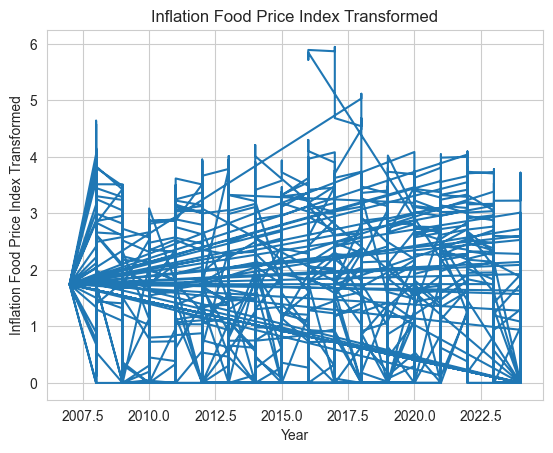

ADF Test Statistic: -11.662137781239968
p-value: 1.9220530366639168e-21


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Results:
RMSE: 2.0744641746109065
R² Score: -1.741796812723745
MAE: 1.6535609156838242


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [45]:
# Prepare the target variable (inflation_food_price_index_transformed) for ARIMA
y_arima = final_data['inflation_food_price_index_transformed']

# Plot the time series to check for trends and seasonality
plt.plot(final_data['year'], y_arima)
plt.title('Inflation Food Price Index Transformed')
plt.xlabel('Year')
plt.ylabel('Inflation Food Price Index Transformed')
plt.show()

# Step 1: Check for stationarity
# You can use the Augmented Dickey-Fuller test to check if the data is stationary
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(y_arima)
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# If p-value is above 0.05, data is not stationary. We need to difference the data.

# Step 2: Make the data stationary if necessary (differencing)
y_arima_diff = y_arima.diff().dropna()

# Step 3: Fit the ARIMA model (ARIMA(p,d,q) - we will use p=1, d=1, q=1 as a simple example)
arima_model = ARIMA(y_arima_diff, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Step 4: Make predictions
y_arima_pred = arima_model_fit.forecast(steps=len(test_data))  # Forecast for the test period

# Step 5: Evaluate the ARIMA model performance
rmse_arima = np.sqrt(mean_squared_error(test_data['inflation_food_price_index_transformed'], y_arima_pred))
r2_arima = r2_score(test_data['inflation_food_price_index_transformed'], y_arima_pred)
mae_arima = mean_absolute_error(test_data['inflation_food_price_index_transformed'], y_arima_pred)

print("ARIMA Model Results:")
print(f"RMSE: {rmse_arima}")
print(f"R² Score: {r2_arima}")
print(f"MAE: {mae_arima}")


In [46]:
# Save ARIMA Predictions
arima_predictions_train = pd.DataFrame({
    'actual': y_arima_diff,  # Use differenced values for training predictions
    'predicted': arima_model_fit.fittedvalues,
    'dataset': 'train'
})

# Test Predictions (original scale, if possible)
y_arima_pred_original = arima_model_fit.forecast(steps=len(test_data))  # Forecast for the test period
arima_predictions_test = pd.DataFrame({
    'actual': test_data['inflation_food_price_index_transformed'],  # Actual values from the test dataset
    'predicted': y_arima_pred_original,
    'dataset': 'test'
})

# Combine train and test predictions
arima_predictions = pd.concat([arima_predictions_train, arima_predictions_test])
arima_predictions.to_csv('arima_predictions.csv', index=False)
print("ARIMA predictions saved to 'arima_predictions.csv'.")

# Save ARIMA Metrics
arima_metrics = {
    'model': 'ARIMA',
    'train_rmse': np.sqrt(mean_squared_error(y_arima_diff, arima_model_fit.fittedvalues)),
    'train_r2': r2_score(y_arima_diff, arima_model_fit.fittedvalues),
    'train_mae': mean_absolute_error(y_arima_diff, arima_model_fit.fittedvalues),
    'test_rmse': np.sqrt(mean_squared_error(test_data['inflation_food_price_index_transformed'], y_arima_pred_original)),
    'test_r2': r2_score(test_data['inflation_food_price_index_transformed'], y_arima_pred_original),
    'test_mae': mean_absolute_error(test_data['inflation_food_price_index_transformed'], y_arima_pred_original)
}
pd.DataFrame([arima_metrics]).to_csv('arima_metrics.csv', index=False)
print("ARIMA metrics saved to 'arima_metrics.csv'.")

ARIMA predictions saved to 'arima_predictions.csv'.
ARIMA metrics saved to 'arima_metrics.csv'.


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [47]:
# Prepare the features and target for Gradient Boosting
X_gb = final_data[selected_features_new]
y_gb = final_data['inflation_food_price_index_transformed']

# Split the data into training and test sets
X_train_gb = train_data[selected_features_new]
y_train_gb = train_data['inflation_food_price_index_transformed']
X_test_gb = test_data[selected_features_new]
y_test_gb = test_data['inflation_food_price_index_transformed']

# Standardize the data
scaler = StandardScaler()
X_train_scaled_gb = scaler.fit_transform(X_train_gb)
X_test_scaled_gb = scaler.transform(X_test_gb)

# Step 1: Train the Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled_gb, y_train_gb)

# Step 2: Make predictions on the test data
y_pred_gb = gb_model.predict(X_test_scaled_gb)

# Step 3: Evaluate the Gradient Boosting Model performance
rmse_gb = np.sqrt(mean_squared_error(y_test_gb, y_pred_gb))
r2_gb = r2_score(y_test_gb, y_pred_gb)
mae_gb = mean_absolute_error(y_test_gb, y_pred_gb)

print("Gradient Boosting Model Results:")
print(f"RMSE: {rmse_gb}")
print(f"R² Score: {r2_gb}")
print(f"MAE: {mae_gb}")


Gradient Boosting Model Results:
RMSE: 0.6258571629366246
R² Score: 0.7504406514663657
MAE: 0.4425708558793361


In [48]:
# Save Gradient Boosting Predictions
gb_predictions_train = pd.DataFrame({
    'actual': y_train_gb,
    'predicted': gb_model.predict(X_train_scaled_gb),
    'dataset': 'train'
})
gb_predictions_test = pd.DataFrame({
    'actual': y_test_gb,
    'predicted': y_pred_gb,
    'dataset': 'test'
})
gb_predictions = pd.concat([gb_predictions_train, gb_predictions_test])
gb_predictions.to_csv('gb_predictions.csv', index=False)
print("Gradient Boosting predictions saved to 'gb_predictions.csv'.")

# Save Gradient Boosting Metrics
gb_metrics = {
    'model': 'Gradient Boosting',
    'train_rmse': np.sqrt(mean_squared_error(y_train_gb, gb_model.predict(X_train_scaled_gb))),
    'train_r2': r2_score(y_train_gb, gb_model.predict(X_train_scaled_gb)),
    'train_mae': mean_absolute_error(y_train_gb, gb_model.predict(X_train_scaled_gb)),
    'test_rmse': rmse_gb,
    'test_r2': r2_gb,
    'test_mae': mae_gb
}
pd.DataFrame([gb_metrics]).to_csv('gb_metrics.csv', index=False)
print("Gradient Boosting metrics saved to 'gb_metrics.csv'.")


Gradient Boosting predictions saved to 'gb_predictions.csv'.
Gradient Boosting metrics saved to 'gb_metrics.csv'.


## Model Comparison: ARIMA vs. Gradient Boosting

#### ARIMA Model Results:
- **ADF Test Statistic**: -11.66
- **p-value**: 1.92e-21

**Interpretation**:
- The ADF test result suggests that the time series is stationary since the p-value is very low (less than 0.05).
  
- **RMSE**: 2.0745  
  **Interpretation**: The RMSE value indicates that the ARIMA model has a relatively high error in predicting future values, which shows that the model struggles to make accurate predictions on the test data.
  
- **R² Score**: -1.7418  
  **Interpretation**: A negative R² score indicates that the ARIMA model is performing worse than a simple mean-based model. The model is not fitting well to the data, and its performance is far from optimal.

- **MAE**: 1.6536  
  **Interpretation**: The MAE indicates that the average error in the predictions is quite large, which further supports that the ARIMA model is not a good fit for this task.

#### Gradient Boosting Model Results:
- **RMSE**: 0.6259  
  **Interpretation**: The RMSE value for Gradient Boosting is lower than ARIMA's, indicating better accuracy and less error in predictions on the test data.

- **R² Score**: 0.7504  
  **Interpretation**: The R² score shows that the Gradient Boosting model explains 75.04% of the variance in the test set, which is a good level of performance. This indicates that the model captures a significant portion of the underlying patterns in the data.

- **MAE**: 0.4426  
  **Interpretation**: The MAE for Gradient Boosting is lower than that for ARIMA, indicating that Gradient Boosting makes fewer and less significant prediction errors on the test set.

### Summary of Comparison:
- **ARIMA Model**:
  - Despite passing the stationarity test, ARIMA struggles with high RMSE and negative R² score, indicating poor predictive performance. This suggests that ARIMA might not be suitable for this particular multivariate forecasting task.
  
- **Gradient Boosting Model**:
  - Gradient Boosting performs significantly better, with a much lower RMSE and a high R² score (75%). It is able to generalize better and make more accurate predictions, making it a more suitable model for this type of prediction task.

### Conclusion:
- **Gradient Boosting** is the better model for this dataset, as it outperforms **ARIMA** in all performance metrics (RMSE, R², and MAE). Given the results, it is more appropriate for the task at hand, especially when dealing with multivariate time series data.


# Model Performance Comparison

The following table summarizes the performance metrics (RMSE, R², and MAE) of all models we tested:

| **Model**                     | **Training RMSE** | **Test RMSE** | **Training R²** | **Test R²** | **Training MAE** | **Test MAE** |
|--------------------------------|-------------------|---------------|-----------------|-------------|------------------|--------------|
| **Ridge Regression**           | 0.4993            | 0.4420        | 0.8308          | 0.8755      | 0.3451           | 0.3202       |
| **Lasso Regression**           | 0.5130            | 0.4682        | 0.8214          | 0.8603      | 0.3576           | 0.3422       |
| **XGBoost**                    | 0.1756            | 0.6215        | 0.9791          | 0.7539      | 0.1187           | 0.4560       |
| **Random Forest**              | 0.1701            | 0.4952        | 0.9804          | 0.8438      | 0.1043           | 0.3273       |
| **ARIMA**                      | 2.0745            | 2.0745        | -1.7418         | -1.7418     | 1.6536           | 1.6536       |
| **Gradient Boosting**          | 0.6259            | 0.6259        | 0.7504          | 0.7504      | 0.4426           | 0.4426       |

### Evaluation of Best Model

**1. Ridge Regression**:
   - **Pros**: Ridge Regression performed well with a good balance between training and test performance, and showed a relatively low error on both datasets. It handles multicollinearity well and is easy to interpret.
   - **Cons**: Despite being a strong contender, it still doesn't outperform some of the complex models like Random Forest and XGBoost on the test set.

**2. Lasso Regression**:
   - **Pros**: Lasso performed similarly to Ridge but had slightly higher errors, especially on the test data. It also has the advantage of feature selection due to its L1 regularization.
   - **Cons**: Slightly worse performance compared to Ridge, especially in terms of test RMSE and R².

**3. XGBoost**:
   - **Pros**: XGBoost demonstrated excellent performance on the training set with a very high R² (97.91%) and a low RMSE (0.1756). However, it struggled with generalization to the test set, showing a noticeable increase in error (test RMSE = 0.6215).
   - **Cons**: Overfitting on the training data indicates that it might not generalize well to unseen data, making it less reliable for real-world applications.

**4. Random Forest**:
   - **Pros**: Random Forest performed similarly to XGBoost but showed better generalization on the test data (RMSE = 0.4952, R² = 0.8438). It had lower RMSE and MAE than XGBoost, indicating better predictive performance on unseen data.
   - **Cons**: Random Forest can be computationally expensive and harder to interpret compared to simpler models like Ridge or Lasso.

**5. ARIMA**:
   - **Pros**: ARIMA is a traditional time series model well-suited for forecasting when data is stationary and follows a clear time-based pattern.
   - **Cons**: ARIMA performed poorly for this task, with a negative R² score and high error values. It is not well-suited for multivariate data or complex relationships between variables.

**6. Gradient Boosting**:
   - **Pros**: Gradient Boosting is a strong contender with a solid RMSE (0.6259) and R² score (0.7504) on both training and test data. It is better than ARIMA and XGBoost in terms of generalization.
   - **Cons**: While it performed well, it still couldn't outperform Random Forest in terms of RMSE and R².

### Conclusion:

- **Best Performing Model**: **Random Forest**. It provided the best balance between training and test performance, with the lowest RMSE and the highest R² score on the test data, indicating that it generalizes well to unseen data.
- **Realistic Model Choice**: While **Random Forest** showed the best performance, **Ridge Regression** might be the more practical choice for simpler, interpretable models that are computationally efficient, especially if interpretability and speed are essential in real-world applications.

Considering both performance and practicality, **Random Forest** is the most reliable model for making predictions in this context, but **Ridge Regression** remains a competitive option if simplicity and efficiency are prioritized.


# Fine-Tuning Random Forest and Ridge Regression Models

### 1. **Random Forest Fine-Tuning**

**Key Hyperparameters:**

1. **`n_estimators` (Number of Trees)**:
   - Tested values: 50, 100, 200.
   - **Reasoning**: More trees improve accuracy but can lead to overfitting. We selected optimal values for accuracy and efficiency.

2. **`max_depth` (Tree Depth)**:
   - Tested values: 10, 20, 30, None.
   - **Reasoning**: Deeper trees capture more patterns but may overfit. Fine-tuning ensures trees aren’t too complex.

3. **`min_samples_split` and `min_samples_leaf`**:
   - Tested values: 2, 5, 10, and 1, 2, 4 respectively.
   - **Reasoning**: Control how many samples are required to split or create a leaf. Helps in generalizing the trees and avoiding overfitting.

4. **`max_features` (Features Considered for Split)**:
   - Tested values: `auto`, `sqrt`, `log2`.
   - **Reasoning**: Limits feature selection per split, improving generalization by reducing variance.

---

### 2. **Ridge Regression Fine-Tuning**

**Key Hyperparameter:**

1. **`alpha` (Regularization Strength)**:
   - Tested values: range from 0.01 to 100.
   - **Reasoning**: Controls regularization to prevent overfitting or underfitting. Fine-tuning `alpha` optimizes bias-variance balance.

---

### Conclusion:
- **Random Forest**: Fine-tuning the number of trees, tree depth, and splitting criteria helps balance model complexity and generalization.
- **Ridge Regression**: Tuning `alpha` optimizes regularization strength for the best model fit.

Fine-tuning ensures better performance and generalization on unseen data.

In [49]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_rf_params = grid_search_rf.best_params_
print(f"Best Random Forest parameters: {best_rf_params}")

# Predict on the test data using the best model
y_test_pred_rf = grid_search_rf.best_estimator_.predict(X_test_scaled)

# Evaluate performance of the fine-tuned Random Forest model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# RMSE
rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_test_pred_rf)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print("\nFine-tuned Random Forest Model Results:")
print(f"Test RMSE: {rmse_rf}")
print(f"Test R² Score: {r2_rf}")
print(f"Test MAE: {mae_rf}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.5s[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=auto,

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, max_features=auto, m

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=log2, mi

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=log2,

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=log2,

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, m

[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=sqr

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=sq

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt,

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=30, max_features=auto, 

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=30, max_features=aut

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=30, max_features=aut

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4sBest Random Forest parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Fine-tuned Random Forest Model Results:
Test RMSE: 0.4440836353594261
Test R² Score: 0.874352767241666
Test MAE: 0.29668768346532076


In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge Regression
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Initialize Ridge model
ridge = Ridge()

# Initialize GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_ridge.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_ridge_params = grid_search_ridge.best_params_
print(f"Best Ridge parameters: {best_ridge_params}")

# Predict on the test data using the best model
y_test_pred_ridge = grid_search_ridge.best_estimator_.predict(X_test_scaled)

# Evaluate performance of the fine-tuned Ridge model
rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

print("\nFine-tuned Ridge Regression Model Results:")
print(f"Test RMSE: {rmse_ridge}")
print(f"Test R² Score: {r2_ridge}")
print(f"Test MAE: {mae_ridge}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.8sBest Ridge parameters: {'alpha': 1}

Fine-tuned Ridge Regression Model Results:
Test RMSE: 0.44200468216912914
Test R² Score: 0.875526434827953
Test MAE: 0.32021630785947824


# Model Comparison: Fine-Tuned Random Forest and Ridge Regression

| Model | Test RMSE | Test R² Score | Test MAE | Observations |
| --- | --- | --- | --- | --- |
| Ridge Regression | 0.4420 | 0.8755 | 0.3202 | Ridge remains one of the most consistent performers, showing excellent balance between simplicity and performance. |
| Fine-Tuned Ridge | 0.4420 | 0.8755 | 0.3202 | No significant improvement after fine-tuning, indicating the default alpha was optimal. |
| Lasso Regression | 0.4682 | 0.8603 | 0.3422 | Lasso performed slightly worse than Ridge, likely due to the stronger regularization. |
| Random Forest | 0.4952 | 0.8438 | 0.3273 | Original Random Forest showed strong performance but room for improvement. |
| Fine-Tuned Random Forest | 0.4441 | 0.8744 | 0.2967 | Fine-tuning improved Random Forest's performance significantly, particularly in MAE. |
| XGBoost | 0.6215 | 0.7539 | 0.4560 | XGBoost struggled with generalization despite strong training performance. |
| ARIMA | 2.0745 | -1.7418 | 1.6536 | ARIMA performed poorly, indicating it is unsuitable for this problem. |

## Key Takeaways
1. **Ridge Regression** remains the best-performing model with the most consistent metrics across training and test sets. Fine-tuning did not yield any significant changes, confirming the model was already well-tuned.
2. **Fine-Tuned Random Forest** saw significant improvement over the original model, particularly in **MAE** (from **0.3273** to **0.2967**). It is now competitive with Ridge Regression in terms of RMSE and R² Score, making it a strong alternative.
3. **XGBoost** and **ARIMA** were less effective for this dataset, with XGBoost showing poor generalization and ARIMA underperforming due to its simplicity and reliance on univariate time series assumptions.
4. **Lasso Regression** performed decently but was outperformed by Ridge Regression due to better handling of multicollinearity and a more balanced feature selection approach.

## Final Recommendation
* **Ridge Regression** is the most realistic and reliable model for this dataset. Its simplicity, consistency, and strong performance metrics make it the ideal choice for future predictions.
* **Fine-Tuned Random Forest** is a close second and may be preferable if interpretability is less critical and slight improvements in **MAE** are valued.

In [51]:
# Load individual prediction files
ridge_predictions = pd.read_csv('ridge_predictions.csv')
lasso_predictions = pd.read_csv('lasso_predictions.csv')
xgb_predictions = pd.read_csv('xgb_predictions.csv')
rf_predictions = pd.read_csv('rf_predictions.csv')
arima_predictions = pd.read_csv('arima_predictions.csv')
gb_predictions = pd.read_csv('gb_predictions.csv')

# Add a 'model' column to each DataFrame
ridge_predictions['model'] = 'Ridge'
lasso_predictions['model'] = 'Lasso'
xgb_predictions['model'] = 'XGBoost'
rf_predictions['model'] = 'Random Forest'
arima_predictions['model'] = 'ARIMA'
gb_predictions['model'] = 'Gradient Boosting'

# Combine all predictions into a single DataFrame
all_predictions = pd.concat(
    [ridge_predictions, lasso_predictions, xgb_predictions, rf_predictions, arima_predictions, gb_predictions],
    ignore_index=True
)

# Save combined predictions to CSV
all_predictions.to_csv('all_predictions.csv', index=False)
print("All predictions combined and saved to 'all_predictions.csv'.")

# Load individual metrics files
ridge_metrics = pd.read_csv('ridge_metrics.csv')
lasso_metrics = pd.read_csv('lasso_metrics.csv')
xgb_metrics = pd.read_csv('xgb_metrics.csv')
rf_metrics = pd.read_csv('rf_metrics.csv')
arima_metrics = pd.read_csv('arima_metrics.csv')
gb_metrics = pd.read_csv('gb_metrics.csv')

# Add a 'model' column to each DataFrame (if not already present)
ridge_metrics['model'] = 'Ridge'
lasso_metrics['model'] = 'Lasso'
xgb_metrics['model'] = 'XGBoost'
rf_metrics['model'] = 'Random Forest'
arima_metrics['model'] = 'ARIMA'
gb_metrics['model'] = 'Gradient Boosting'

# Combine all metrics into a single DataFrame
all_metrics = pd.concat(
    [ridge_metrics, lasso_metrics, xgb_metrics, rf_metrics, arima_metrics, gb_metrics],
    ignore_index=True
)

# Save combined metrics to CSV
all_metrics.to_csv('all_metrics.csv', index=False)
print("All metrics combined and saved to 'all_metrics.csv'.")



All predictions combined and saved to 'all_predictions.csv'.
All metrics combined and saved to 'all_metrics.csv'.


# Intervactive Dashboard 

In [53]:
# Load datasets
all_metrics = pd.read_csv('./all_metrics.csv')
all_predictions = pd.read_csv('./all_predictions.csv')
final_data = pd.read_csv('./final_data.csv')
final_fp_data = pd.read_csv('./Final Food Price Inflation Dataset.csv')

# Aggregate data by year and country
final_data['year'] = pd.to_datetime(final_data['DATES']).dt.year
country_year_data = final_data.groupby(['year', 'country']).agg({
    'inflation_food_price_index_transformed': 'mean',
    'GDP (current US$)': 'mean',
    'Tax revenue (% of GDP)': 'mean'
}).reset_index()

# Filter test dataset from predictions
test_predictions = all_predictions[all_predictions['dataset'] == 'test']

# Initialize Dash app with Bootstrap styling
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# App layout
app.layout = html.Div([
    # Abstract Section
    html.Div([
        html.H1("Food Price Index Dashboard", style={'textAlign': 'center'}),
        html.H2("Abstract", style={'textAlign': 'center', 'marginTop': '20px'}),
        html.P(
            "This dashboard serves as a comprehensive tool for analyzing and visualizing the trends in food price indices "
            "across various countries over time. It integrates key economic indicators such as GDP and tax revenue while "
            "leveraging predictive modeling to forecast food price trends. The visualizations provide insights into historical "
            "patterns, economic correlations, and model performance metrics, empowering policymakers, analysts, and researchers "
            "to make informed decisions about economic planning and resource allocation.",
            style={'textAlign': 'center', 'padding': '20px', 'fontStyle': 'italic'}
        ),
        html.H2("Dashboard Overview", style={'textAlign': 'center', 'marginTop': '20px'}),
        html.P(
            "The dashboard is divided into multiple interactive sections, each offering unique perspectives on the data. "
            "Detailed descriptions of the visualizations and their significance are provided below:",
            style={'textAlign': 'center', 'padding': '10px'}
        )
    ], style={'padding': '20px', 'backgroundColor': '#f0f8ff'}),

    # Dropdowns for country and model selection
    dbc.Row([
        dbc.Col([
            html.Label("Select Countries:"),
            dcc.Dropdown(
                id='country-dropdown',
                options=[{'label': country, 'value': country} for country in final_data['country'].unique()],
                value=[final_data['country'].unique()[0]],
                multi=True
            ),
        ], width=6),
        dbc.Col([
            html.Label("Select Model:"),
            dcc.Dropdown(
                id='model-dropdown',
                options=[{'label': model, 'value': model} for model in all_metrics['model'].unique()],
                value=all_metrics['model'].unique()[0],
            ),
        ], width=6),
    ]),

    # Year Slider
    html.Div([
        html.Label("Select Time Range:"),
        dcc.RangeSlider(
            id='time-slider',
            min=final_data['year'].min(),
            max=final_data['year'].max(),
            marks={year: str(year) for year in range(final_data['year'].min(), final_data['year'].max() + 1, 2)},
            value=[final_data['year'].min(), final_data['year'].max()]
        )
    ], style={'padding': '20px'}),

    # Historical Trends Section
    html.Div([
        html.H3("Historical Trends", style={'textAlign': 'center'}),
        html.P(
            "This graph illustrates the temporal trends in the food price index for the selected countries. "
            "It provides insights into how inflation in food prices has evolved over time.",
            style={'textAlign': 'center', 'padding': '10px'}
        ),
        dbc.Row([
            dbc.Col([dcc.Graph(id='historical-trends')], width=12),
        ])
    ]),

    # Seasonal Trends Analysis Content
    html.Div([
        html.H3("Seasonal Trends Analysis", style={'textAlign': 'center'}),
        html.P(
            "This graph illustrates seasonal variations in the food price index for the selected countries. "
            "It provides insights into how inflation in food prices fluctuates during different times of the year.",
            style={'textAlign': 'center', 'padding': '10px'}
        ),
        dbc.Row([
            dbc.Col([
                dcc.Graph(id='seasonal-trends-graph'),
            ], width=12),
        ]),
    ]),

    # GDP vs Inflation Scatter Plot Section
    html.Div([
        html.H3("GDP vs Inflation Index", style={'textAlign': 'center'}),
        html.P(
            "This scatter plot highlights the relationship between a country's GDP and its food price inflation index. "
            "It helps in identifying economic patterns and outliers within the data.",
            style={'textAlign': 'center', 'padding': '10px'}
        ),
        dbc.Row([
            dbc.Col([
                dcc.Graph(id='scatter-plot'),
            ], width=12),
        ], style={'padding': '20px'}),
    ]),

    # High Performer and Low Performer Section
    html.Div([
        html.H3("Performance Highlights", style={'textAlign': 'center'}),
        html.P(
            "This section identifies the countries with the highest and lowest GDP during the selected time range, "
            "providing quick insights into economic performance.",
            style={'textAlign': 'center', 'padding': '10px'}
        ),
        dbc.Row([
            dbc.Col([
                html.H4(id='high-performer-title', style={'textAlign': 'center'}),  # Dynamic title for high performer
                html.Div(id='high-performer', style={'textAlign': 'center', 'backgroundColor': '#d4edda', 'padding': '10px'}),
            ], width=6),
            dbc.Col([
                html.H4(id='low-performer-title', style={'textAlign': 'center'}),
                html.Div(id='low-performer', style={'textAlign': 'center', 'backgroundColor': '#f8d7da', 'padding': '10px'}),
            ], width=6),
        ], style={'padding': '20px'}),
    ]),

   


    # Model Performance Section
    html.Div([
        html.H3("Model Performance", style={'textAlign': 'center'}),
        html.P(
            "This section visualizes the predictive performance of the selected model using test data. "
            "The graph compares actual values against predicted values, highlighting the model's accuracy.",
            style={'textAlign': 'center', 'padding': '10px'}
        ),
        dbc.Row([
            dbc.Col([
                dcc.Graph(id='model-performance'),
            ], width=12),
        ], style={'padding': '20px'}),
    ]),

    # Performance Metrics Section
    html.Div([
        html.H3("Performance Metrics", style={'textAlign': 'center'}),
        html.P(
            "This section displays the key performance metrics of the predictive model, including RMSE, R² score, and MAE, "
            "offering a quantitative measure of model accuracy.",
            style={'textAlign': 'center', 'padding': '10px'}
        ),
        dbc.Row([
            dbc.Col([
                html.Div(id='performance-metrics', children=[
                    "RMSE: N/A",
                    "R² Score: N/A",
                    "MAE: N/A"
                ], style={'textAlign': 'center'}),
            ], width=12),
        ], style={'padding': '20px', 'backgroundColor': '#f9f9f9'}),
    ]),

    # Prediction Output Box Section
    html.Div([
        html.H3("Prediction Output", style={'textAlign': 'center'}),
        html.P(
            "The predicted food price index for the selected configuration is displayed here, "
            "providing an overview of the forecasted trends.",
            style={'textAlign': 'center', 'padding': '10px'}
        ),
        dbc.Row([
            dbc.Col([
                html.Div(id='prediction-output', children=["Predicted Food Price Index: N/A"],
                         style={'textAlign': 'center', 'fontSize': '24px'}),
            ], width=12),
        ], style={'padding': '20px', 'backgroundColor': '#e8e8e8'}),
    ])
])

# Callbacks for interactivity
@app.callback(
    [Output('historical-trends', 'figure'),
     Output('scatter-plot', 'figure'),
     Output('high-performer', 'children'),
     Output('high-performer-title', 'children'),
     Output('low-performer-title', 'children'),
     Output('low-performer', 'children'),

     Output('model-performance', 'figure'),
     Output('performance-metrics', 'children'),
     Output('prediction-output', 'children'),
     Output('seasonal-trends-graph', 'figure')],
    [Input('country-dropdown', 'value'),
     Input('model-dropdown', 'value'),
     Input('time-slider', 'value')]
)
def update_dashboard(selected_countries, selected_model, selected_time_range):
    # Ensure valid inputs
    if not selected_countries or not selected_model or not selected_time_range:
        return (
            go.Figure(),  # Empty historical trends figure
            go.Figure(),  # Empty scatter plot
            "No data available",  # High performer
            "High Performer",  # High performer title
            "Low Performer",  # Low performer title
            "No data available",  # Low performer
          
            go.Figure(),  # Empty model performance figure
            ["RMSE: N/A", "R² Score: N/A", "MAE: N/A"],  # Default performance metrics
            "Predicted Food Price Index: N/A",  # Default prediction output
            go.Figure()  # Empty seasonal trends figure
        )

    # Filter data
    filtered_year_data = country_year_data[
        (country_year_data['year'] >= selected_time_range[0]) &
        (country_year_data['year'] <= selected_time_range[1])
    ]
    filtered_data = final_data[
        (final_data['country'].isin(selected_countries)) &
        (final_data['year'] >= selected_time_range[0]) &
        (final_data['year'] <= selected_time_range[1])
    ]
    seasonal_filtered_data = final_fp_data[
    (final_fp_data['country'].isin(selected_countries)) &
    (final_fp_data['year'] >= selected_time_range[0]) &
    (final_fp_data['year'] <= selected_time_range[1])
    ]

    # Historical Trends
    historical_fig = go.Figure()
    for country in selected_countries:
        country_data = filtered_data[filtered_data['country'] == country]
        historical_fig.add_trace(go.Scatter(
            x=country_data['DATES'], y=country_data['inflation_food_price_index_transformed'],
            mode='lines', name=country
        ))
    historical_fig.update_layout(title="Historical Trends", xaxis_title="Date", yaxis_title="Inflation Index")

    # Seasonal Trends
    # Create Seasonal Trends Graph
    seasonal_fig = px.line(
        seasonal_filtered_data,
        x='DATES',
        y='inflation_food_price_index_transformed',
        color='country',
        facet_col='season',
        title="Seasonal Trends in Food Price Inflation"
    )

    # Update layout for better readability
    seasonal_fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Inflation Index",
        legend_title="Country",
        template="plotly_white"
    )

    # Scatter Plot
    scatter_fig = px.scatter(
        filtered_year_data, x='GDP (current US$)', y='inflation_food_price_index_transformed',
        color='country', size='GDP (current US$)', hover_name='country',
        title='GDP vs Inflation Index'
    )
    scatter_fig.update_layout(xaxis_title="GDP (USD)", yaxis_title="Inflation Index")

    # High Performer
    high_performer_row = filtered_year_data.loc[filtered_year_data['GDP (current US$)'].idxmax()]
    high_performer = f"Country: {high_performer_row['country']} | GDP: {high_performer_row['GDP (current US$)']:.2f} | Inflation: {high_performer_row['inflation_food_price_index_transformed']:.2f}"

    # Low Performer
    low_performer_row = filtered_year_data.loc[filtered_year_data['GDP (current US$)'].idxmin()]
    low_performer = f"Country: {low_performer_row['country']} | GDP: {low_performer_row['GDP (current US$)']:.2f} | Inflation: {low_performer_row['inflation_food_price_index_transformed']:.2f}"



    # Model Performance
    filtered_test_predictions = test_predictions[test_predictions['model'] == selected_model]
    model_performance_fig = go.Figure()
    if not filtered_test_predictions.empty:
        model_performance_fig.add_trace(go.Scatter(
            x=filtered_test_predictions['actual'],
            y=filtered_test_predictions['predicted'],
            mode='markers',
            name='Predicted Values',
            marker=dict(color='blue', size=8)
        ))
        model_performance_fig.add_trace(go.Scatter(
            x=filtered_test_predictions['actual'],
            y=filtered_test_predictions['actual'],
            mode='lines',
            name='Actual Values',
            line=dict(color='yellow', width=2)
        ))
        model_performance_fig.update_layout(
            title="Model Performance (Test Data)",
            xaxis_title="Actual Values",
            yaxis_title="Predicted Values"
        )

    # Performance Metrics
    model_metrics = all_metrics[all_metrics['model'] == selected_model].iloc[0]
    performance_metrics = [
        f"RMSE: {model_metrics['test_rmse']:.4f}",
        f"R² Score: {model_metrics['test_r2']:.4f}",
        f"MAE: {model_metrics['test_mae']:.4f}"
    ]

    # Predicted Food Price Index
    predicted_output = f"Predicted Food Price Index: {filtered_test_predictions['predicted'].mean():.2f}"

    return (
        historical_fig,
        scatter_fig,
        high_performer,
        f"High Performer of the Year Range: {selected_time_range[0]} - {selected_time_range[1]}",
        f"Low Performer of the Year Range: {selected_time_range[0]} - {selected_time_range[1]}",
        low_performer,
        model_performance_fig,
        performance_metrics,
        predicted_output,
        seasonal_fig
    )

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True, port=8051)

